# Project 1: Standardized Testing, Statistical Summaries and Inference

## Problem Statement

The new format for the SAT was released in March 2016.  The College Board has tracked statewide participation and recommends where money is best spent to improve SAT participation rates.  Recent statewide policy changes in Illinois and Colorado now require all high school juniors to take the SAT starting 2017.  While this type of initiative effectively increases SAT participation to 100%, students taking the test out of requirement will not perform well. This negates the whole purpose of the SAT, which is to help students gain admission to higher education.  We will observe how changes in SAT and ACT participation rates are correlated with statewide SAT and ACT average scores. 

## Executive Summary

SAT and ACT Participation rates are negatively correlated with their corresponding test scores. States with high participation rates tend to have two bimodal test scores distributions: One peak from high performing students, and another peak from students taking the test out of requirement. States that implemented policies to require the SAT witnessed a decrease in average SAT scores. If the purpose of increasing SAT participation is to increase student admissions to college, the College Board must address how to better prepare students to take the test. Otherwise, students taking the test out of requirement tend to perform poorly.

### Contents:
- Data Munging
    - [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
    - [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [415]:
#Imports:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'

# specific to jupyter notebooks
%matplotlib inline 

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [416]:
# Read in SAT 2017 and ACT 2017
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [417]:
#Display SAT 2017:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [418]:
#Display ACT 2017:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:  
The **ACT 2017** dataset consists of the participation rate and average scores of ACT test-takers in 2017 from each of the following:
* the 50 states
* District of Columbia
* the National average

The scores are split between: 
* English
* Math
* Reading
* Science
* Composite (average of the four subject tests)

The **SAT 2017** dataset consists of the participation rate and average scores of SAT test-takers in 2017 from each of the following:
* the 50 states
* District of Columbia. 

The scores are split between:
* Evidence-Based Reading and Writing (EBRW)
* Math
* Total (sum of EBRW and Math)

#### 4a. Does the data look complete? 

Answer:  
ACT 2017 has National stats, while SAT 2017 does not.  
Otherwise, the data is complete. There are some typos and incorrect values to be fixed later.

In [419]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


In [420]:
act_2017.describe().T

,count,mean,std,min,25%,50%,75%,max
English,52.0,20.919231,2.332132,16.3,19.000,20.55,23.300,25.5
Math,52.0,21.173077,1.963602,18.0,19.400,20.90,23.100,25.3
Reading,52.0,22.001923,2.048672,18.1,20.475,21.70,24.125,26.0
Science,52.0,21.040385,3.151113,2.3,19.900,21.15,22.525,24.9


In [421]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [422]:
sat_2017.describe().T

,count,mean,std,min,25%,50%,75%,max
Evidence-Based Reading and Writing,51.0,569.117647,45.666901,482.0,533.5,559.0,613.0,644.0
Math,51.0,547.627451,84.909119,52.0,522.0,548.0,599.0,651.0
Total,51.0,1126.098039,92.494812,950.0,1055.5,1107.0,1212.0,1295.0


#### 4b. Find obvious issues with the observations

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer:  
The dataset was compared with the source. The following issues were found in the datasets:
* ACT 2017 Science and SAT 2017 Math scores for Maryland are off by a factor of 10.  
* ACT 2017 Wyoming Composite score has a 'x'.


**ACT**:  
Minimum: 1  
Maximum: 36  

**SAT**:  
Minimum subscore: 200  
Maximum subscore: 800  
Minimum score: 1600  
Maximum score: 400

In [423]:
mask = act_2017['State'] == 'Maryland'
act_2017.loc[mask]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [424]:
mask = sat_2017['State'] == 'Maryland'
sat_2017.loc[mask]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [425]:
mask = act_2017['State'] == 'Maryland'
act_2017.loc[mask, 'Science'] = 23.2
act_2017.loc[mask]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,23.2,23.6


In [426]:
mask = sat_2017['State'] == 'Maryland'
sat_2017.loc[mask, 'Math'] = 524
sat_2017.loc[mask]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060


#### 5. Display data types of each feature

In [427]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [428]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

ACT 2017 and SAT 2017 ```Participation``` should be ```int```. Because of the percent (%) symbol, it was read in as ```object```.  
ACT 2017 ```Composite``` should also be ```float```. Because of the 'x' in ACT 2017 Wyoming Composite, it was read in as ```object```.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

```def``` method:

In [429]:
def str_percent_to_int(percent):
    if type(percent) == str:
        return int(percent[:-1])
    else:
        return percent

In [430]:
act_2017['Participation'] = act_2017['Participation'].apply(str_percent_to_int)
sat_2017['Participation'] = sat_2017['Participation'].apply(str_percent_to_int)

```lambda``` method:

In [431]:
act_2017['Participation'] = act_2017['Participation'].apply(lambda percent : 
                                                                int(percent[:-1] if type(percent) == str 
                                                                else percent))
sat_2017['Participation'] = sat_2017['Participation'].apply(lambda percent : 
                                                                int(percent[:-1] if type(percent) == str 
                                                                else percent))

- Fix any individual values preventing other columns from being the appropriate type.

In [432]:
mask = act_2017['State'] == 'Wyoming'
act_2017.loc[mask]

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100,19.4,19.8,20.8,20.6,20.2x


In [433]:
mask = act_2017['State'] == 'Wyoming'
act_2017.loc[mask, 'Composite'] = 20.2
act_2017.loc[mask]

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100,19.4,19.8,20.8,20.6,20.2


In [434]:
act_2017['Composite'] = act_2017['Composite'].apply(lambda x : float(x))

- Finish your data modifications by making sure the columns are now typed appropriately.

In [435]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null int64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [436]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null int64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


- Display the data types again to confirm they are correct.

In [437]:
#Code:
act_2017.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [438]:
sat_2017.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

#### 7. Rename Columns

In [439]:
# append "act_2017_" to the beginning of the corresponding column names
act_2017 = act_2017.rename(columns = {'State' : 'state'})
mapper = {old_col : 'act_2017_'+old_col.lower() for old_col in act_2017.columns[1:]}
act_2017 = act_2017.rename(columns = mapper)

# append "sat_2017_" to the beginning of the corresponding column names
sat_2017 = sat_2017.rename(columns = {'Evidence-Based Reading and Writing' : 'ebrw',
                                      'State' : 'state'})

mapper = {old_col : 'sat_2017_'+old_col.lower() for old_col in sat_2017.columns[1:]}
sat_2017 = sat_2017.rename(columns = mapper)



In [440]:
act_2017.columns

Index(['state', 'act_2017_participation', 'act_2017_english', 'act_2017_math',
       'act_2017_reading', 'act_2017_science', 'act_2017_composite'],
      dtype='object')

In [441]:
sat_2017.columns

Index(['state', 'sat_2017_participation', 'sat_2017_ebrw', 'sat_2017_math',
       'sat_2017_total'],
      dtype='object')

#### 8. Create a data dictionary


|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|_object_|ACT 2017|U.S. State, region or district|
|act_2017_participation|_int_|ACT 2017|Percentage of students who participated in taking the test|
|act_2017_english|_float_|ACT 2017|Average score in the English test|
|act_2017_math|_float_|ACT 2017|Average score in the Math test|
|act_2017_reading|_float_|ACT 2017|Average score in the Reading test|
|act_2017_science|_float_|ACT 2017|Average score in the Science test|
|act_2017_composite|_float_|ACT 2017|Average score of all subject-area tests|
|state|_object_|SAT 2017|U.S. State, region or district|
|sat_2017_participation|_int_|SAT 2017|Percentage of students who participated in taking the test|
|sat_2017_ebrw|_int_|SAT 2017|Average score in the Evidence-Based Reading & Writing section|
|sat_2017_math|_int_|SAT 2017|Average score in the Math section|
|sat_2017_total|_int_|SAT 2017|Total score of both sections|



#### 9. Drop unnecessary rows

In [442]:
# Drop national
mask = act_2017['state'] == 'National'

act_2017 = act_2017.drop(act_2017.loc[mask].index)

In [443]:
act_2017.loc[mask]

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key.

In [444]:
combined_2017 = pd.merge(act_2017, sat_2017, on='state')

In [445]:
combined_2017.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_ebrw,sat_2017_math,sat_2017_total
0,Alabama,100,18.9,18.4,19.7,19.4,19.2,5,593,572,1165
1,Alaska,65,18.7,19.8,20.4,19.9,19.8,38,547,533,1080
2,Arizona,62,18.6,19.8,20.1,19.8,19.7,30,563,553,1116
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4,3,614,594,1208
4,California,31,22.5,22.7,23.1,22.2,22.8,53,531,524,1055


#### 11. Save the cleaned, merged dataframe

In [446]:
combined_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

*Manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

#### 1. Read In SAT & ACT  Data

In [447]:
act_2018 = pd.read_csv('../data/act_2018.csv')
sat_2018 = pd.read_csv('../data/sat_2018.csv')

#### 2. Display Data

In [448]:
#Display ACT 2018:
act_2018.head()

,State,Participation,Composite
0,Connecticut,26%,25.6
1,Massachusetts,25%,25.5
2,New Hampshire,16%,25.1
3,New York,27%,24.5
4,Michigan,22%,24.4


In [449]:
#Display SAT 2018:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Minnesota,4%,643,655,1298
1,Wisconsin,3%,641,653,1294
2,North Dakota,2%,640,643,1283
3,Iowa,3%,634,631,1265
4,Kansas,4%,633,631,1265


#### 3. Verbally Describe Data

Answer:  
The **ACT 2018** dataset consists of the participation rate and average scores of ACT test-takers in 2018 from each of the following:
* the 50 states
* District of Columbia
* the National average

Only the Composite (average of the four subject tests) score is recorded.

The **SAT 2018** dataset consists of the participation rate and average scores of SAT test-takers in 2018 from each of the following:
* the 50 states
* District of Columbia. 

The scores are split between:
* Evidence-Based Reading and Writing (EBRW)
* Math
* Total (sum of EBRW and Math)

#### 4a. Does the data look complete? 

Answer:  
ACT 2018 has National stats, while SAT 2018 does not.  
ACT 2018 does not have stats for subject tests: English, Math, Reading, Science.  
There are some typos and incorrect values to be fixed later.

In [450]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
State            52 non-null object
Participation    52 non-null object
Composite        52 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [451]:
act_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
Composite,52.0,21.484615,2.099055,17.7,19.975,21.05,23.625,25.6


In [452]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [453]:
sat_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
Evidence-Based Reading and Writing,51.0,563.686275,47.502627,480.0,534.5,552.0,610.5,643.0
Math,51.0,556.235294,47.772623,480.0,522.5,544.0,593.5,655.0
Total,51.0,1120.019608,94.155083,977.0,1057.5,1098.0,1204.0,1298.0


#### 4b. Are there any obvious issues with the observations?

Since the dataset was collected hastily by several cohorts at the same time, there may have been some mixups during the data collection process. SF Cohort collaborated in double checking the values and our findings were as follows:

**ACT 2018:**
* New Mexico participation rate is off by 1%
* District of Columbia is listed as 'Washington, D.C.'. For consistency and to avoid confusion with Washington state, we will change this to District of Columbia.

**SAT 2018:**
* Typos: Missississippi and Oaklahoma.  
* Florida, Hawaii, Indiana, and Utah are entirely incorrect
* Kansas, North Carolina, and South Dakota Totals is off by 1

**Other issues:**
* The dataset is not alphabetized. 


In [454]:
# states that are not in combined_2017
mask = ~sat_2018['State'].isin(combined_2017['state'])
sat_2018[mask]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
10,Missississippi,3%,630,606,1236
37,Oaklahoma,8%,541,521,1062


In [455]:
# states that are not in combined_2017
mask = ~act_2018['State'].isin(combined_2017['state'])
act_2018[mask]

,State,Participation,Composite
13,"Washington, D.C.",32%,23.6
27,National,55%,20.8


#### 4c. Fix any errors you identified

In [456]:
# Fix ACT 2018 New Mexico participation
act_2018.loc[act_2018['State'] == 'New Mexico', 'Participation'] = '67%'
act_2018.loc[act_2018['State'] == 'New Mexico']

,State,Participation,Composite
42,New Mexico,67%,19.4


In [457]:
# Fix ACT 2018 District of Columbia listed as 'Washington, D.C.'
act_2018.loc[act_2018['State'] == 'Washington, D.C.', 'State'] = 'District of Columbia'
act_2018.loc[act_2018['State'] == 'District of Columbia']

,State,Participation,Composite
13,District of Columbia,32%,23.6


In [458]:
# Fix SAT 2018 Mississippi
sat_2018.loc[sat_2018['State'] == 'Missississippi', 'State'] = 'Mississippi'
sat_2018.loc[sat_2018['State'] == 'Mississippi']

,State,Participation,Evidence-Based Reading and Writing,Math,Total
10,Mississippi,3%,630,606,1236


In [459]:
# Fix SAT 2018 Oklahoma
sat_2018.loc[sat_2018['State'] == 'Oaklahoma', 'State'] = 'Oklahoma'
sat_2018.loc[sat_2018['State'] == 'Oklahoma']

,State,Participation,Evidence-Based Reading and Writing,Math,Total
37,Oklahoma,8%,541,521,1062


In [460]:
# Fix SAT 2018 Florida, Hawaii, Indiana, Utah
sat_2018.loc[sat_2018['State'] == 'Florida', 'Participation':'Total'] = ['97%', 522, 493, 1014]
sat_2018.loc[sat_2018['State'] == 'Florida']

,State,Participation,Evidence-Based Reading and Writing,Math,Total
23,Florida,97%,522,493,1014


In [461]:
sat_2018.loc[sat_2018['State'] == 'Hawaii', 'Participation':'Total'] = ['56%', 550, 549, 1099]
sat_2018.loc[sat_2018['State'] == 'Hawaii']

,State,Participation,Evidence-Based Reading and Writing,Math,Total
45,Hawaii,56%,550,549,1099


In [462]:
sat_2018.loc[sat_2018['State'] == 'Indiana', 'Participation':'Total'] = ['67%', 546, 539, 1086]
sat_2018.loc[sat_2018['State'] == 'Indiana']

,State,Participation,Evidence-Based Reading and Writing,Math,Total
32,Indiana,67%,546,539,1086


In [463]:
sat_2018.loc[sat_2018['State'] == 'Utah', 'Participation':'Total'] = ['4%', 618, 612, 1230]
sat_2018.loc[sat_2018['State'] == 'Utah']

,State,Participation,Evidence-Based Reading and Writing,Math,Total
46,Utah,4%,618,612,1230


In [464]:
# Fix Kansas, North Carolina, and South Dakota totals
sat_2018.loc[sat_2018['State'] == 'Kansas', 'Total'] = 1264
sat_2018.loc[sat_2018['State'] == 'Kansas']

,State,Participation,Evidence-Based Reading and Writing,Math,Total
4,Kansas,4%,633,631,1264


In [465]:
sat_2018.loc[sat_2018['State'] == 'North Carolina', 'Total'] = 1097
sat_2018.loc[sat_2018['State'] == 'North Carolina']

,State,Participation,Evidence-Based Reading and Writing,Math,Total
25,North Carolina,52%,554,543,1097


In [466]:
sat_2018.loc[sat_2018['State'] == 'South Dakota', 'Total'] = 1241
sat_2018.loc[sat_2018['State'] == 'South Dakota']

,State,Participation,Evidence-Based Reading and Writing,Math,Total
9,South Dakota,3%,622,618,1241


In [467]:
# sort by state
act_2018 = act_2018.sort_values(by = 'State')

sat_2018 = sat_2018.sort_values(by = 'State')

# reset index
act_2018 = act_2018.reset_index(drop = True)
sat_2018 = sat_2018.reset_index(drop = True)


#### 5. What are your data types? 

In [468]:
act_2018.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [469]:
sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

#### 6. Fix Incorrect Data Types

Change Participation data type from ```object``` to ```int```.

In [470]:
act_2018['Participation'] = act_2018['Participation'].apply(str_percent_to_int)
sat_2018['Participation'] = sat_2018['Participation'].apply(str_percent_to_int)

#### 7. Rename Columns

In [471]:
# append "act_2018_" to the beginning of the corresponding column names
act_2018 = act_2018.rename(columns = {'State' : 'state'})
mapper = {old_col : 'act_2018_'+old_col.lower() for old_col in act_2018.columns[1:]}
act_2018 = act_2018.rename(columns = mapper)

sat_2018 = sat_2018.rename(columns = {'State' : 'state'})
sat_2018 = sat_2018.rename(columns = {'Evidence-Based Reading and Writing' : 'ebrw'})
# append "sat_2018_" to the beginning of the corresponding column names
mapper = {old_col : 'sat_2018_'+old_col.lower() for old_col in sat_2018.columns[1:]}
sat_2018 = sat_2018.rename(columns = mapper)



In [472]:
act_2018.columns

Index(['state', 'act_2018_participation', 'act_2018_composite'], dtype='object')

In [473]:
sat_2018.columns

Index(['state', 'sat_2018_participation', 'sat_2018_ebrw', 'sat_2018_math',
       'sat_2018_total'],
      dtype='object')

#### 8. Create a data dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|_object_|ACT 2018|U.S. State, region or district|
|act_2018_participation|_int_|ACT 2018|Percentage of students who participated in taking the test|
|act_2018_composite|_float_|ACT 2018|Average score of all subject-area tests|
|state|_object_|SAT 2018|U.S. State, region or district|
|sat_2018_participation|_int_|SAT 2018|Percentage of students who participated in taking the test|
|sat_2018_ebrw|_int_|SAT 2018|Average score in the Evidence-Based Reading & Writing section|
|sat_2018_math|_int_|SAT 2018|Average score in the Math section|
|sat_2018_total|_int_|SAT 2018|Total score of both sections|



#### 9. Drop unnecessary rows

In [474]:
mask = act_2018['state'] == 'National'

act_2018 = act_2018.drop(act_2018.loc[mask].index)

In [475]:
act_2018.loc[mask]

,state,act_2018_participation,act_2018_composite


#### 10. Merge Dataframes

In [476]:
combined_2018 = pd.merge(act_2018, sat_2018, on='state')

In [477]:
combined_2018.head()

,state,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_ebrw,sat_2018_math,sat_2018_total
0,Alabama,100,19.1,6,595,571,1166
1,Alaska,33,20.8,43,562,544,1106
2,Arizona,66,19.2,29,577,572,1149
3,Arkansas,100,19.4,5,592,576,1169
4,California,27,22.7,60,540,536,1076


#### 11. Save your cleaned, merged dataframe

In [478]:
combined_2018.to_csv('../data/combined_2018.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [479]:
# combine 2017 and 2018 data
final = pd.merge(combined_2017, combined_2018, on='state')

In [480]:
final.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_ebrw,sat_2017_math,sat_2017_total,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_ebrw,sat_2018_math,sat_2018_total
0,Alabama,100,18.9,18.4,19.7,19.4,19.2,5,593,572,1165,100,19.1,6,595,571,1166
1,Alaska,65,18.7,19.8,20.4,19.9,19.8,38,547,533,1080,33,20.8,43,562,544,1106
2,Arizona,62,18.6,19.8,20.1,19.8,19.7,30,563,553,1116,66,19.2,29,577,572,1149
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4,3,614,594,1208,100,19.4,5,592,576,1169
4,California,31,22.5,22.7,23.1,22.2,22.8,53,531,524,1055,27,22.7,60,540,536,1076


In [481]:
final.to_csv('../data/final.csv')

#### 12. Create a Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|_object_|final|U.S. State, region or district|
|act_2017_participation|_int_|final|Percentage of students who participated in taking the test in 2017|
|act_2017_english|_float_|final|Average score in the English test in 2017|
|act_2017_math|_float_|final|Average score in the Math test in 2017|
|act_2017_reading|_float_|final|Average score in the Reading test in 2017|
|act_2017_science|_float_|final|Average score in the Science test in 2017|
|act_2017_composite|_float_|final|Average score of all subject-area tests in 2017|
|sat_2017_participation|_int_|final|Percentage of students who participated in taking the test in 2017|
|sat_2017_ebrw|_int_|final|Average score in the Evidence-Based Reading & Writing section in 2017|
|sat_2017_math|_int_|final|Average score in the Math section in 2017|
|sat_2017_total|_int_|final|Total score of both sections in 2017|
|act_2018_participation|_int_|final|Percentage of students who participated in taking the test in 2018|
|act_2018_composite|_float_|final|Average score of all subject-area tests in 2018|
|sat_2018_participation|_int_|final|Percentage of students who participated in taking the test in 2018|
|sat_2018_ebrw|_int_|final|Average score in the Evidence-Based Reading & Writing section in 2018|
|sat_2018_math|_int_|final|Average score in the Math section in 2018|
|sat_2018_total|_int_|final|Total score of both sections in 2018|



## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [482]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
act_2017_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_2017_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_2017_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_2017_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_2017_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_2017_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
sat_2017_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_2017_ebrw,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_2017_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_2017_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [483]:
import math

def stdev(X):
    '''
    Arguments:
    X: Series of numeric values

    Returns:
    Standard deviation of X
    '''
    mu = X.mean() # mean of X
    n = len(X) # length of X
    
    x_mu = X.apply(lambda x : (x - mu) ** 2) # (x - mu)^2
    
    return math.sqrt(x_mu.sum() / n)

In [484]:
stdev(final['sat_2018_ebrw'])

44.871185617623894

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [485]:
# Filter only columns with numeric values
# Get stdev of each numeric column and store in dictionary sd in the form {'column' : stdev(column)}

sd = {column : stdev(final[column]) \
      for column in final \
      if final[column].dtype == int or final[column].dtype == float}

In [486]:
sd

{'act_2017_participation': 31.824175751231806,
 'act_2017_english': 2.3304876369363368,
 'act_2017_math': 1.9624620273436781,
 'act_2017_reading': 2.046902931484265,
 'act_2017_science': 1.7222161451443672,
 'act_2017_composite': 2.0007860815819893,
 'sat_2017_participation': 34.929070766645076,
 'sat_2017_ebrw': 45.21697020437866,
 'sat_2017_math': 46.65713364485504,
 'sat_2017_total': 91.58351056778743,
 'act_2018_participation': 33.745194881997506,
 'act_2018_composite': 2.0968220768561987,
 'sat_2018_participation': 37.63965409204986,
 'sat_2018_ebrw': 44.871185617623894,
 'sat_2018_math': 48.405899469194466,
 'sat_2018_total': 92.91994462540738}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [487]:
final.describe().T['std']

act_2017_participation    32.140842
act_2017_english           2.353677
act_2017_math              1.981989
act_2017_reading           2.067271
act_2017_science           1.739353
act_2017_composite         2.020695
sat_2017_participation    35.276632
sat_2017_ebrw             45.666901
sat_2017_math             47.121395
sat_2017_total            92.494812
act_2018_participation    34.080976
act_2018_composite         2.117686
sat_2018_participation    38.014187
sat_2018_ebrw             45.317676
sat_2018_math             48.887562
sat_2018_total            93.844544
Name: std, dtype: float64

In [488]:
np.std(final)

act_2017_participation    31.824176
act_2017_english           2.330488
act_2017_math              1.962462
act_2017_reading           2.046903
act_2017_science           1.722216
act_2017_composite         2.000786
sat_2017_participation    34.929071
sat_2017_ebrw             45.216970
sat_2017_math             46.657134
sat_2017_total            91.583511
act_2018_participation    33.745195
act_2018_composite         2.096822
sat_2018_participation    37.639654
sat_2018_ebrw             44.871186
sat_2018_math             48.405899
sat_2018_total            92.919945
dtype: float64

Answer:
The manually calculated standard deviation matches up with numpy's ```std``` method, but does not match up with the output from pandas ```describe```.  
The manually calculated method and numpy's ```std``` method return the _population_ standard deviation, while the pandas ```std``` returns the _sample_ standard deviation.  
To manually calculate the sample standard deviation, we must divide by ```n-1``` instead of ```n```.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

#### Define a function that takes a column name as an argument, and returns two dataframes containing the rows with the lowest and highest values in that column.

In [489]:
def get_min_max(col_name):
    '''
    Arguments:
    col_name : String column name to find rows with max and min values
    
    Return:
    low : DataFrame of rows with lowest value
    high : DataFrame of rows with highest value
    '''
    # rows with highest value
    mask = final[col_name] == final[col_name].max() 
    high = final.loc[mask]
    
    # rows with lowest value
    mask = final[col_name] == final[col_name].min()
    low = final.loc[mask]
    
    return low, high

#### Define a function that takes a description and two dataframes with lowest and highest values as arguments, and prints the arguments in a nice output.

In [490]:
def print_min_max(description, low, high):
    '''
    Arguments:
    description: String description of the metric
    low: DataFrame of rows with lowest value
    high: DataFrame of rows highest value
    
    Prints the description, highest and lowest values, and the states with those values.
    '''
    print('Highest {}: {}\n {}\nLowest {}: {}\n {}'
          .format(description, high[col_name].values[0], high['state'].values, 
                  description, low[col_name].values[0], low['state'].values))

States that have the **highest and lowest participation rates** for the:
**2017 SAT, 2018 SAT, 2017 ACT, 2018 ACT**

In [491]:
# Masking method
participation_dict = {'sat_2017_participation' : 'SAT 2017 Participation Rate',
                'sat_2018_participation' : 'SAT 2018 Participation Rate', 
                'act_2017_participation' : 'ACT 2017 Participation Rate',
                'act_2018_participation' : 'ACT 2018 Participation Rate'}

scores_dict = {'sat_2017_total' : 'SAT 2017 Total Score',
                'sat_2018_total' : 'SAT 2018 Total Score',
                'act_2017_composite' : 'ACT 2017 Composite Score',
                'act_2018_composite': 'ACT 2018 Composite Score'}

# combine dictionaries
columns_dict = {**participation_dict, **scores_dict} 

# dictionary containing the rows with lowest and highest values of each column
min_max_stats = {}
# min_max_stats = {'sat_2017_participation' : (low, high),
#                  'sat_2018_participation' : (low, high),
#                   ...
#                 }

# Print the highest and lowest participation rate and the corresponding states.
for col_name, col_desc in participation_dict.items():
    # Get rows with lowest and highest values
    low, high = get_min_max(col_name)
    min_max_stats[col_name] = low, high
    
    # Print highest and lowest values and states 
    print_min_max(col_desc, low, high)
    
    

Highest SAT 2017 Participation Rate: 100
 ['Connecticut' 'Delaware' 'District of Columbia' 'Michigan']
Lowest SAT 2017 Participation Rate: 2
 ['Iowa' 'Mississippi' 'North Dakota']
Highest SAT 2018 Participation Rate: 100
 ['Colorado' 'Connecticut' 'Delaware' 'Idaho' 'Michigan']
Lowest SAT 2018 Participation Rate: 2
 ['North Dakota']
Highest ACT 2017 Participation Rate: 100
 ['Alabama' 'Arkansas' 'Colorado' 'Kentucky' 'Louisiana' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nevada' 'North Carolina' 'Oklahoma'
 'South Carolina' 'Tennessee' 'Utah' 'Wisconsin' 'Wyoming']
Lowest ACT 2017 Participation Rate: 8
 ['Maine']
Highest ACT 2018 Participation Rate: 100
 ['Alabama' 'Arkansas' 'Kentucky' 'Louisiana' 'Mississippi' 'Missouri'
 'Montana' 'Nebraska' 'Nevada' 'North Carolina' 'Ohio' 'Oklahoma'
 'South Carolina' 'Tennessee' 'Utah' 'Wisconsin' 'Wyoming']
Lowest ACT 2018 Participation Rate: 7
 ['Maine']


States that have the **highest and lowest composite/total scores** for the:
**2017 SAT, 2018 SAT, 2017 ACT, 2018 ACT**

In [492]:
# Print the highest and lowest test scores and the corresponding states.
for col_name, col_desc in scores_dict.items():
    # Get rows with lowest and highest values
    low, high = get_min_max(col_name)
    min_max_stats[col_name] = low, high
    
    # Print highest and lowest values and states 
    print_min_max(col_desc, low, high)

Highest SAT 2017 Total Score: 1295
 ['Minnesota']
Lowest SAT 2017 Total Score: 950
 ['District of Columbia']
Highest SAT 2018 Total Score: 1298
 ['Minnesota']
Lowest SAT 2018 Total Score: 977
 ['District of Columbia']
Highest ACT 2017 Composite Score: 25.5
 ['New Hampshire']
Lowest ACT 2017 Composite Score: 17.8
 ['Nevada']
Highest ACT 2018 Composite Score: 25.6
 ['Connecticut']
Lowest ACT 2018 Composite Score: 17.7
 ['Nevada']


#### Do any states with 100% participation on a given test have a rate change year-to-year?

**SAT:**  
District of Columbia left the 100 club in 2018.  
Colorado, Connecticut, Idaho joined the 100 club in 2018.

In [493]:
# See which states left or joined the SAT 100 club
sat_2017_max = min_max_stats['sat_2017_participation'][1]['state']
sat_2018_max = min_max_stats['sat_2018_participation'][1]['state']

# Who left the 100 club
mask = ~sat_2017_max.isin(sat_2018_max)
left_sat_100 = sat_2017_max[mask]

# Who joined the 100 club
mask = ~sat_2018_max.isin(sat_2017_max)
joined_sat_100 = sat_2018_max[mask]

states = [state for state in left_sat_100.append(joined_sat_100)]
mask = final['state'].isin(states)
final.loc[mask, ['state', 'sat_2017_participation', 'sat_2018_participation']]

,state,sat_2017_participation,sat_2018_participation
5,Colorado,11,100
8,District of Columbia,100,92
12,Idaho,93,100


**ACT:**  
Colorado and Minnesota left the 100 club in 2018.  
Nebraska and Ohio joined the 100 club in 2018.

In [494]:
# See which states left or joined the ACT 100 club
act_2017_max = min_max_stats['act_2017_participation'][1]['state']
act_2018_max = min_max_stats['act_2018_participation'][1]['state']

# Who left the 100 club
mask = ~act_2017_max.isin(act_2018_max)
left_act_100 = act_2017_max[mask]

# Who joined the 100 club
mask = ~act_2018_max.isin(act_2017_max)
joined_act_100 = act_2018_max[mask]

# Show all states that left or joined the 100 club
states = [state for state in left_act_100.append(joined_act_100)]
mask = final['state'].isin(states)
final.loc[mask, ['state', 'act_2017_participation', 'act_2018_participation']]

,state,act_2017_participation,act_2018_participation
5,Colorado,100,30
23,Minnesota,100,99
27,Nebraska,84,100
35,Ohio,75,100


States with >50% participation on both tests in **2017**:  
Florida, Georgia, Hawaii

In [495]:
# See which states have >50% participation on both tests in 2017
mask = (final['act_2017_participation'] > 50) & (final['sat_2017_participation'] > 50)
over_50_2017 = final[mask]

over_50_2017.loc[:, ['state', 'act_2017_participation', 'sat_2017_participation']]

,state,act_2017_participation,sat_2017_participation
9,Florida,73,83
10,Georgia,55,61
11,Hawaii,90,55


States with >50% participation on both tests in **2018**:  
Florida, Georgia, Hawaii, North Carolina, South Carolina

In [496]:
# See which states have >50% participation on both tests in 2018
mask = (final['act_2018_participation'] > 50) & (final['sat_2018_participation'] > 50)
over_50_2018 = final[mask]

over_50_2018.loc[:, ['state', 'act_2018_participation', 'sat_2018_participation']]

,state,act_2018_participation,sat_2018_participation
9,Florida,66,97
10,Georgia,53,70
11,Hawaii,89,56
33,North Carolina,100,52
40,South Carolina,100,55


In [497]:
# Sorting method
# for column in final[list(columns.keys())]:
#     sorted_final = final.sort_values(by = col_name, ascending = False)
#     high = sorted_final.iloc[0]
#     low = sorted_final.iloc[-1]
#     print(high)
#     print(col_desc, sorted_final[final[col]]['state'], low)

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [498]:
final.columns

Index(['state', 'act_2017_participation', 'act_2017_english', 'act_2017_math',
       'act_2017_reading', 'act_2017_science', 'act_2017_composite',
       'sat_2017_participation', 'sat_2017_ebrw', 'sat_2017_math',
       'sat_2017_total', 'act_2018_participation', 'act_2018_composite',
       'sat_2018_participation', 'sat_2018_ebrw', 'sat_2018_math',
       'sat_2018_total'],
      dtype='object')

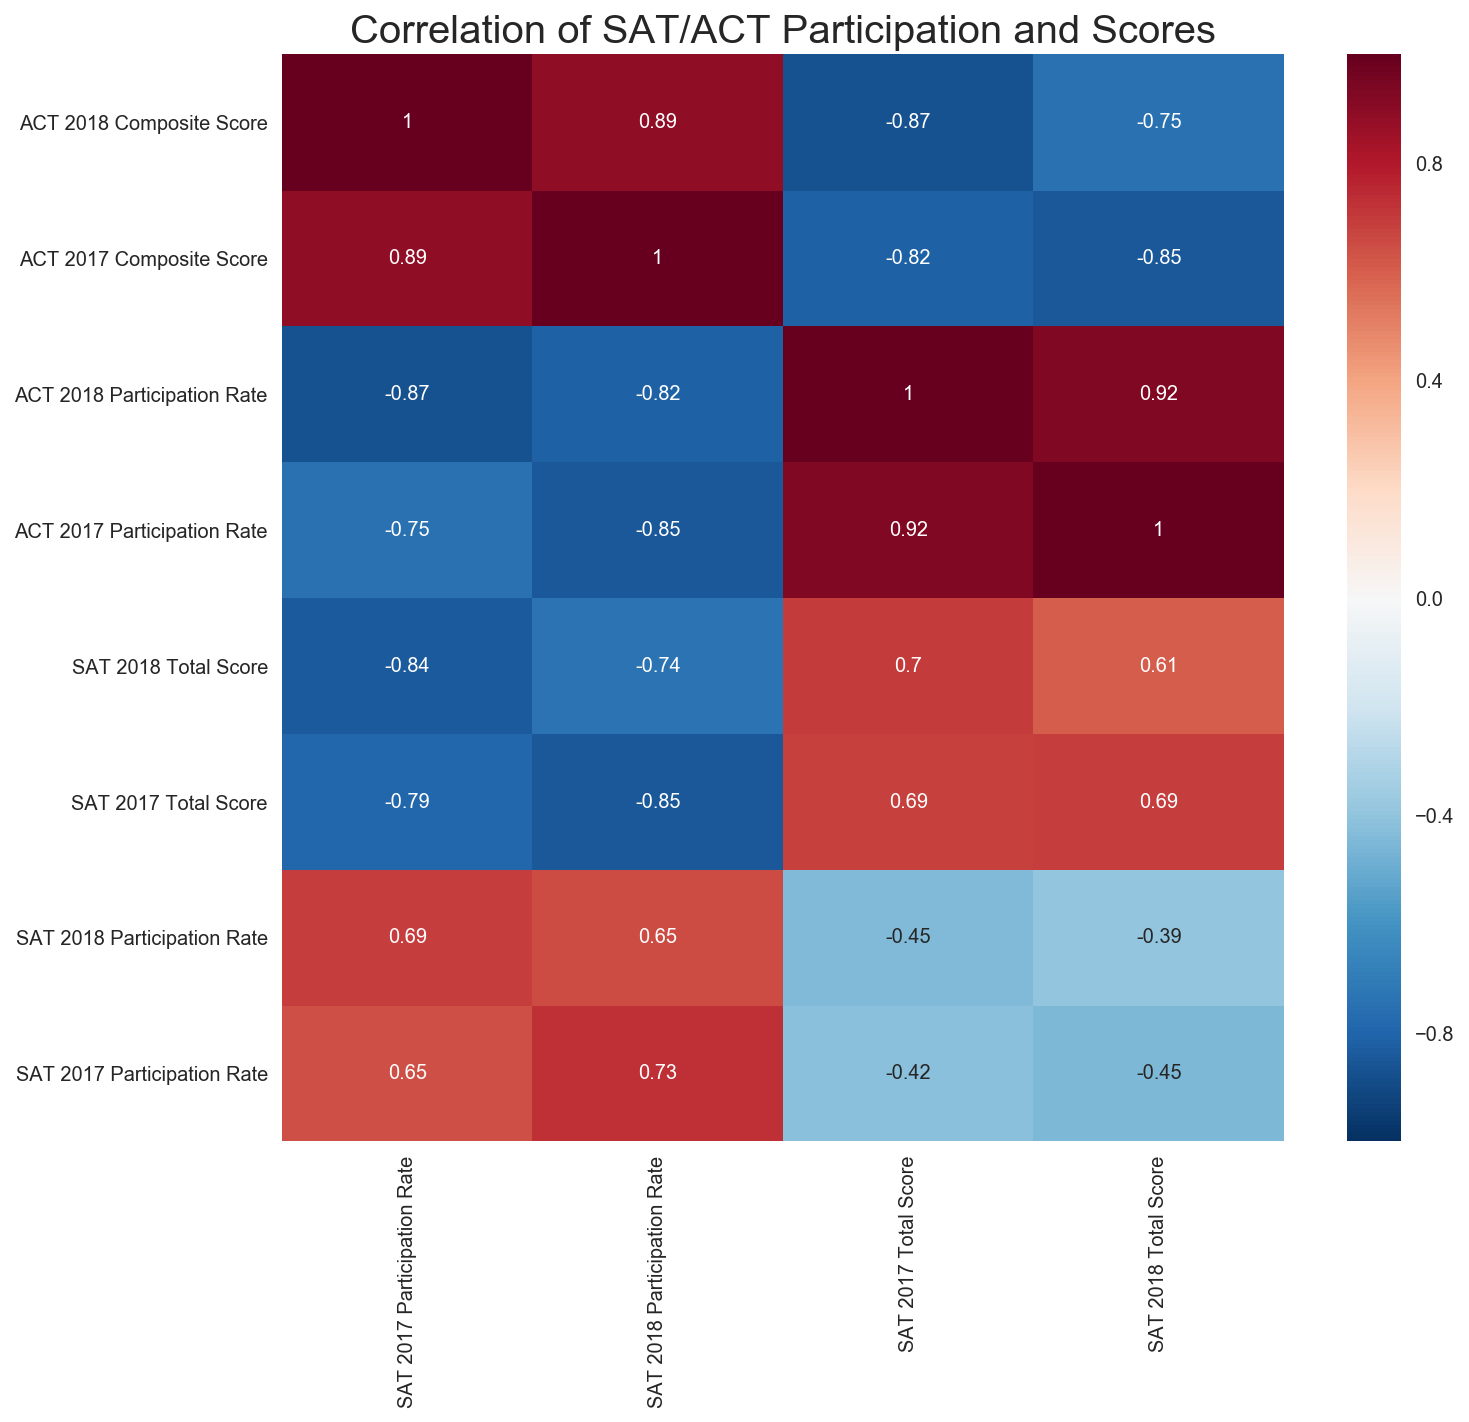

In [499]:
'''
Plots have titles
Plots have axis labels
Plots have appropriate tick labels
All text is legible in a plot
Plots demonstrate meaningful and valid relationships
Plots are interpreted to aid understanding
'''

# Since we do not have 2018 data for ACT subject tests, 
# we will only analyze the Composite test.
act_columns = ['act_2017_participation', 'act_2018_participation',
               'act_2017_composite', 'act_2018_composite']
sat_columns = ['sat_2017_participation', 'sat_2018_participation',
               'sat_2017_total', 'sat_2018_total']
columns = sat_columns + act_columns

column_labels = [columns_dict[col] \
                 for col in columns\
                 if col in columns_dict]
sat_column_labels = [columns_dict[col] \
                     for col in sat_columns\
                     if col in columns_dict]


# print('Columns:\n', column_labels)
plt.figure(figsize=(10, 10))
plt.title('Correlation of SAT/ACT Participation and Scores', size = 20)

correlation = final[sat_columns + act_columns].corr()
ax = sns.heatmap(correlation[sat_columns], xticklabels=sat_column_labels, annot=True);

# ax.xaxis.set_ticks_position('top') # set x labels to appear on top of plot
ax.set_xticklabels(sat_column_labels, rotation = 90) # rename and rotate x labels
ax.set_yticklabels(column_labels) # rename y labels

plt.show()

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [500]:
def subplot_histograms(df, list_of_columns, list_of_titles):
    nrows = int(np.ceil(len(list_of_columns)/2))    # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, 
                           figsize=(10, nrows*6),   # You'll want to specify your figsize
                           sharey = True, sharex = True) # Sync x and y range
    ax = ax.ravel()                                 # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns):    # Gives us an index value to get into all our lists
        ax[i].hist(df[column])               # feel free to add more settings
        ax[i].set_title(list_of_titles[i], fontsize = 15)
        # ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel("Frequency", fontsize = 15)
        # ax[i].set_yticks() # rename y labels
        
    # If length of list is odd, delete the last blank figure
    if len(list_of_columns)%2 == 1:
        fig.delaxes(ax.flatten()[len(list_of_columns)])
        
        
        

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [501]:
# dictionary of math and reading column names, and their descriptions
math_dict = {'act_2017_math' : 'ACT 2017 Math',
             'sat_2017_math' : 'SAT 2017 Math',
             'sat_2018_math' : 'SAT 2018 Math'
            }
reading_dict = {'act_2017_english' : 'ACT 2017 English',
                'act_2017_reading' : 'ACT 2017 Reading',
                'sat_2017_ebrw' : 'SAT 2017 EBRW',
                'sat_2018_ebrw' : 'SAT 2018 EBRW'
               }
total_dict = {'sat_2017_total' : 'SAT 2017 Total',
              'sat_2018_total' : 'SAT 2018 Total',
              'act_2017_composite' : 'ACT 2017 Composite',
              'act_2018_composite' : 'ACT 2018 Composite'}
# Dictionary of column names and their descriptions
columns_dict = {**participation_dict, **math_dict, **reading_dict, **total_dict} 

# Sets of columns to share axes for comparison
sat_participation = ['sat_2017_participation', 'sat_2018_participation']
act_participation = ['act_2017_participation', 'act_2018_participation']
sat_math = ['sat_2017_math', 'sat_2018_math']
act_math = ['act_2017_math']
sat_ebrw = ['sat_2017_ebrw', 'sat_2018_ebrw']
act_ebrw = ['act_2017_english', 'act_2017_reading']
sat_total = ['sat_2017_total', 'sat_2018_total']
act_composite = ['act_2017_composite', 'act_2018_composite']

# compare = [sat_participation, act_participation, act_math, sat_math, act_ebrw, sat_ebrw]

# Plot each set of columns
# for comp in compare:
#     subplot_histograms(final, comp, 
#                        [columns_dict[col] for col in comp])
    

In [502]:
def multi_plot(columns):
    '''
    Plot histograms of each column in columns.
    '''
    subplot_histograms(final, columns, 
                       [columns_dict[col] for col in columns])
    

**SAT Participation Rates**  
The distribution of SAT participation rates slightly increased in 2018.

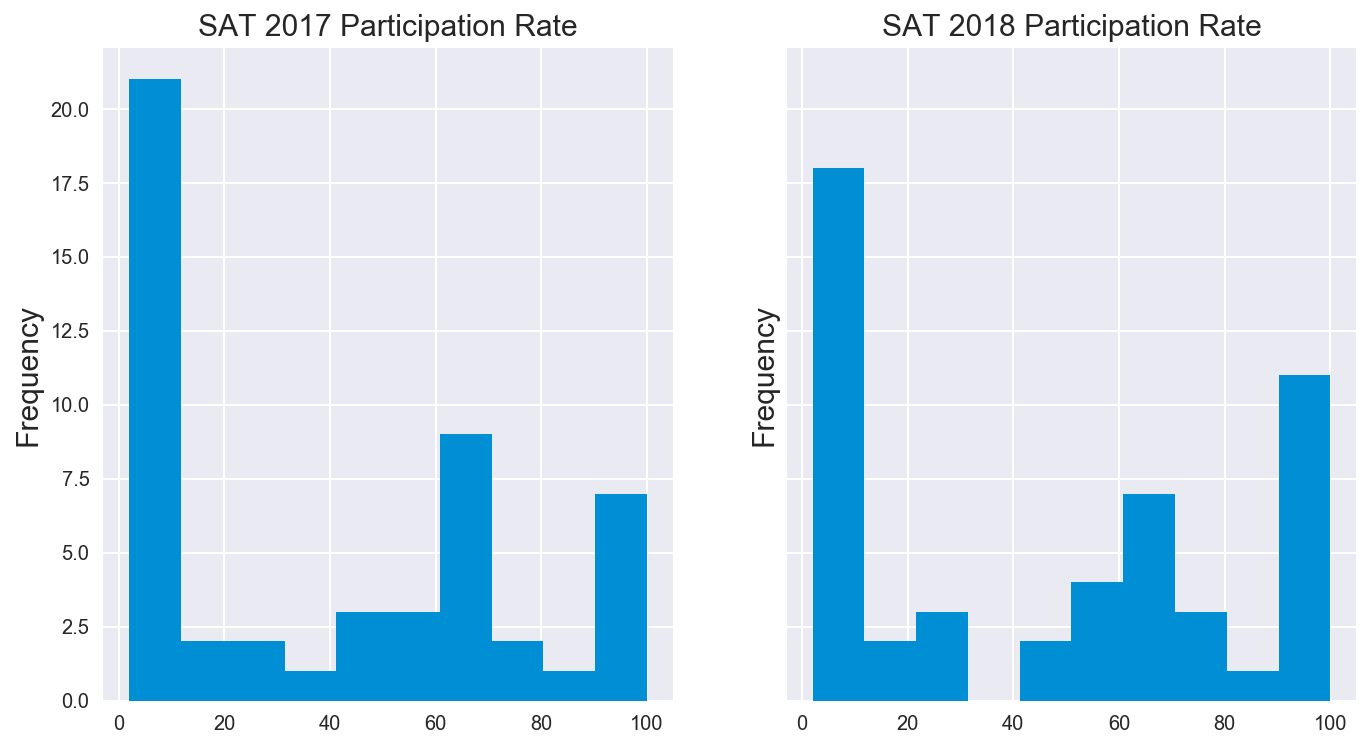

In [503]:
multi_plot(sat_participation)

**ACT Participation Rates**  
The distribution of ACT participation rates slightly decreased in 2018.

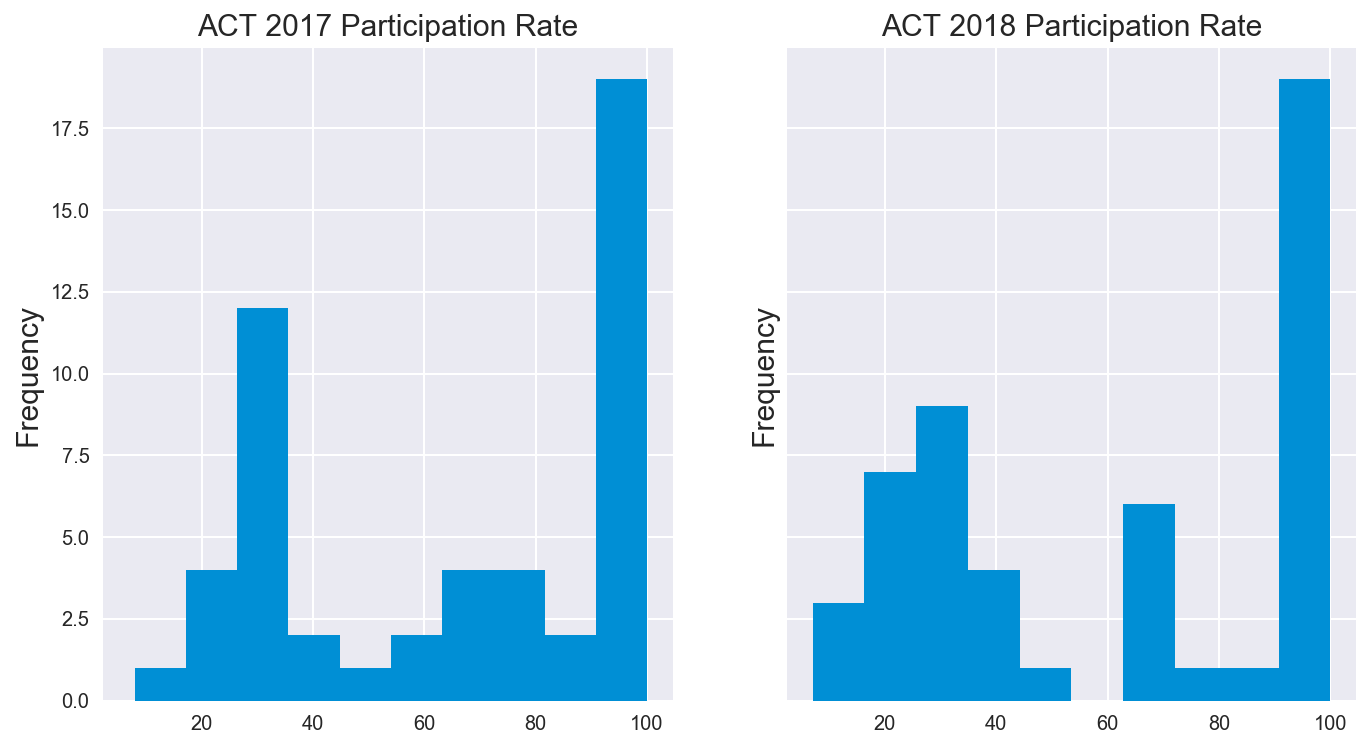

In [504]:
multi_plot(act_participation)

**SAT Math Scores**  
The distribution of SAT math scores became more condensed in 2018. Both distributions are bimodal.

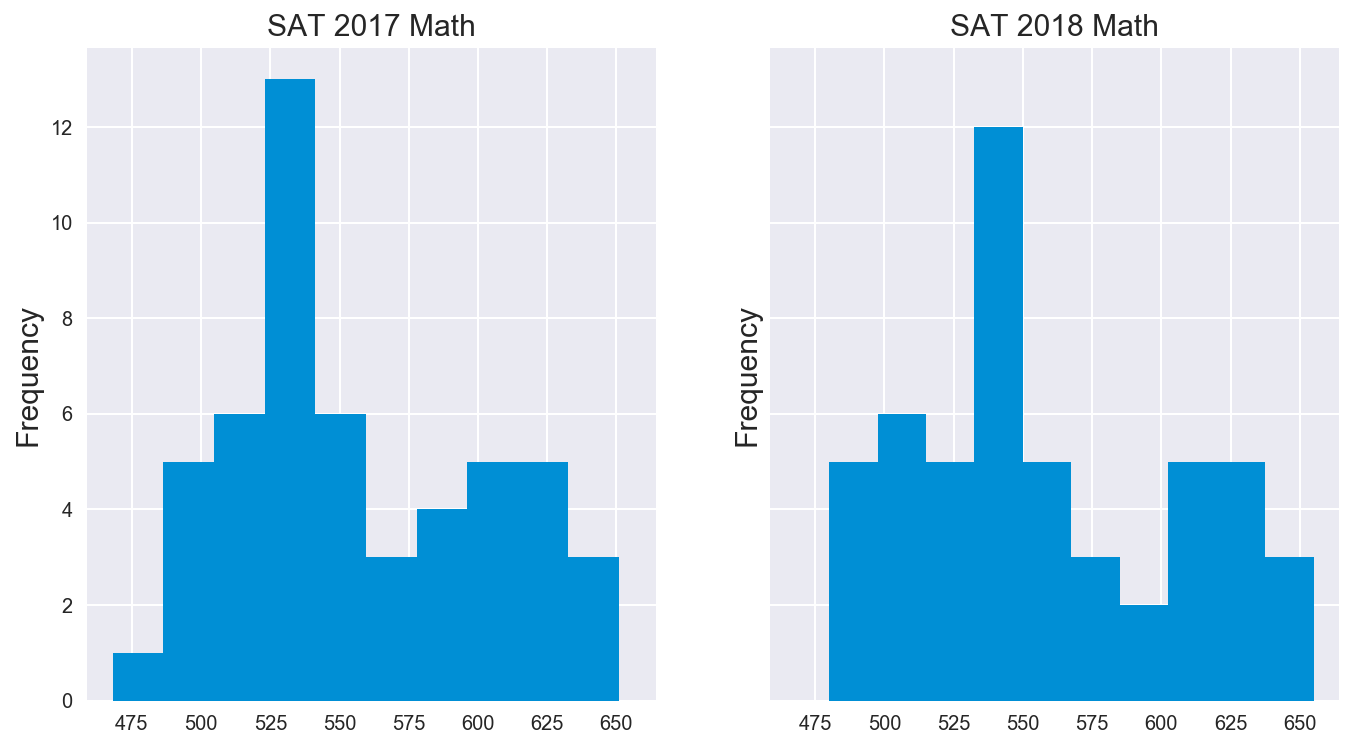

In [505]:
multi_plot(sat_math)

**ACT Math Scores**  
Since ACT 2018 Math scores were not collected, there is nothing to compare it to.  
The distribution appears to be bimodal, right skewed. 

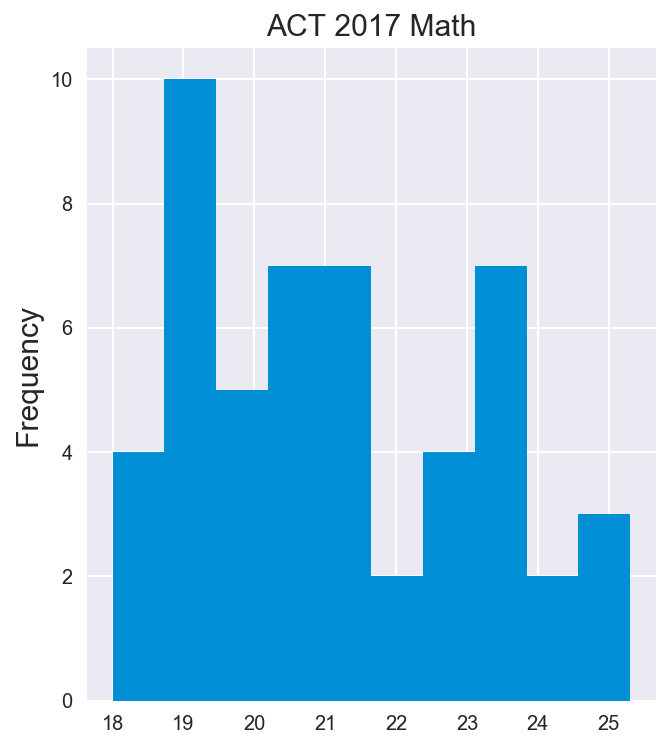

In [506]:
multi_plot(act_math)

**SAT EBRW Scores**  
The distribution of SAT EBRW scores seems to have shifted toward the middle. Both distributions are bimodal.

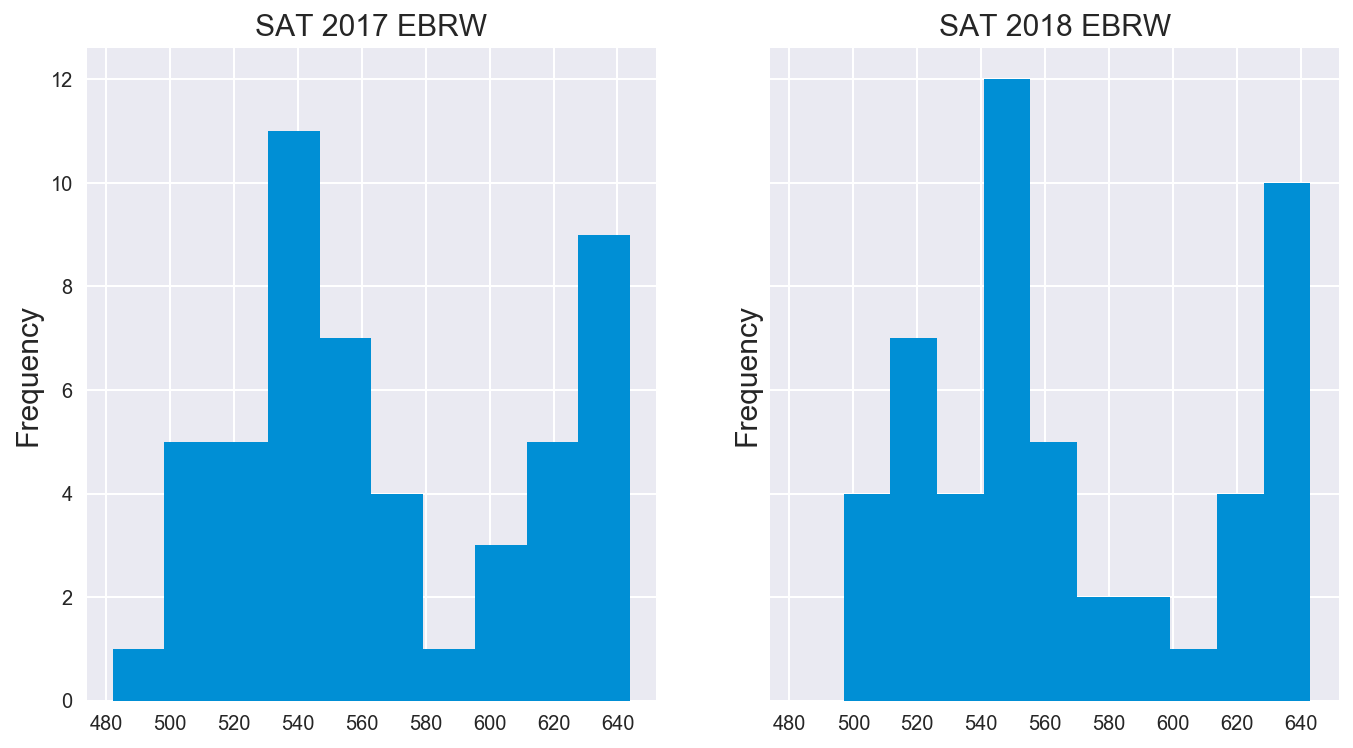

In [507]:
multi_plot(sat_ebrw)

**ACT English and Reading Scores**  
Since 2018 English and Reading scores were not collected, they cannot be compared.  
The ACT 2017 English distribution appears to be staggeredly distributed.  
The ACT 2017 Reading distribution average appears to be slightly higher than the English scores.

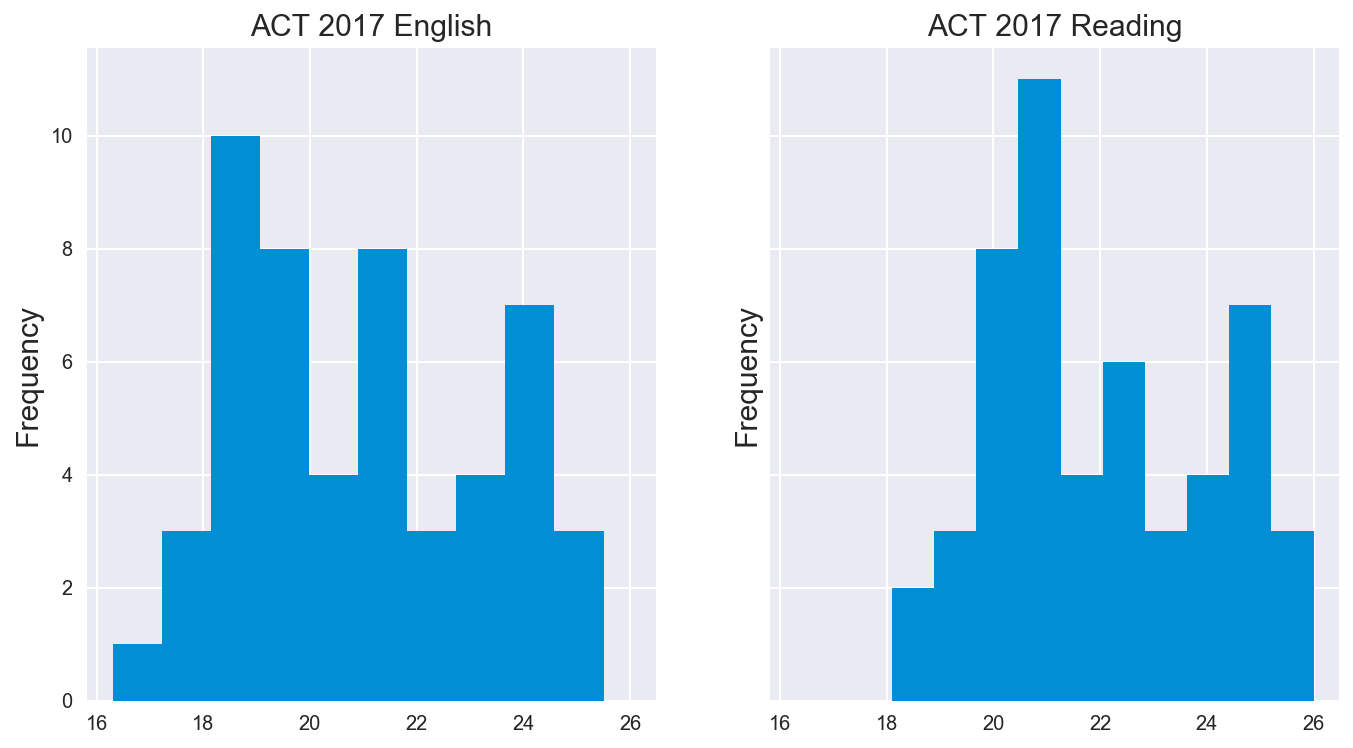

In [508]:
multi_plot(act_ebrw)

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [509]:
def custom_scatterplot(df, x, y, xlab, ylab, title):
    # Set figure size and axes labels
    plt.figure(figsize = (8, 8))
    plt.title(title, fontsize = 15)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    
    # Plot the scatterplot
    plt.scatter(df[x], df[y])
        

**SAT vs. ACT math scores in 2017**  


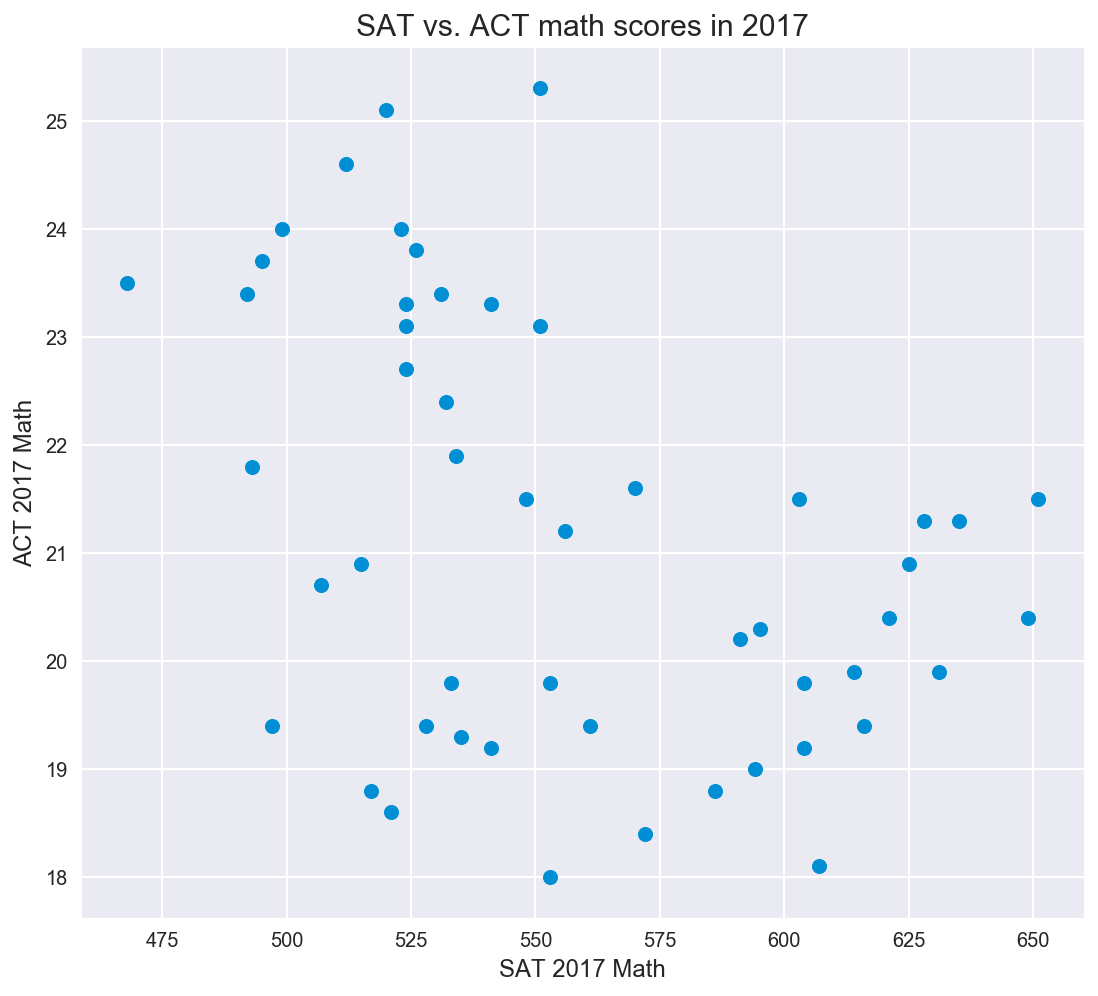

In [510]:
stat1 = 'sat_2017_math'
stat2 = 'act_2017_math'
custom_scatterplot(final, stat1, stat2, 
                   columns_dict[stat1], columns_dict[stat2],
                   'SAT vs. ACT math scores in 2017')

**SAT vs. ACT verbal/reading scores in 2017**  


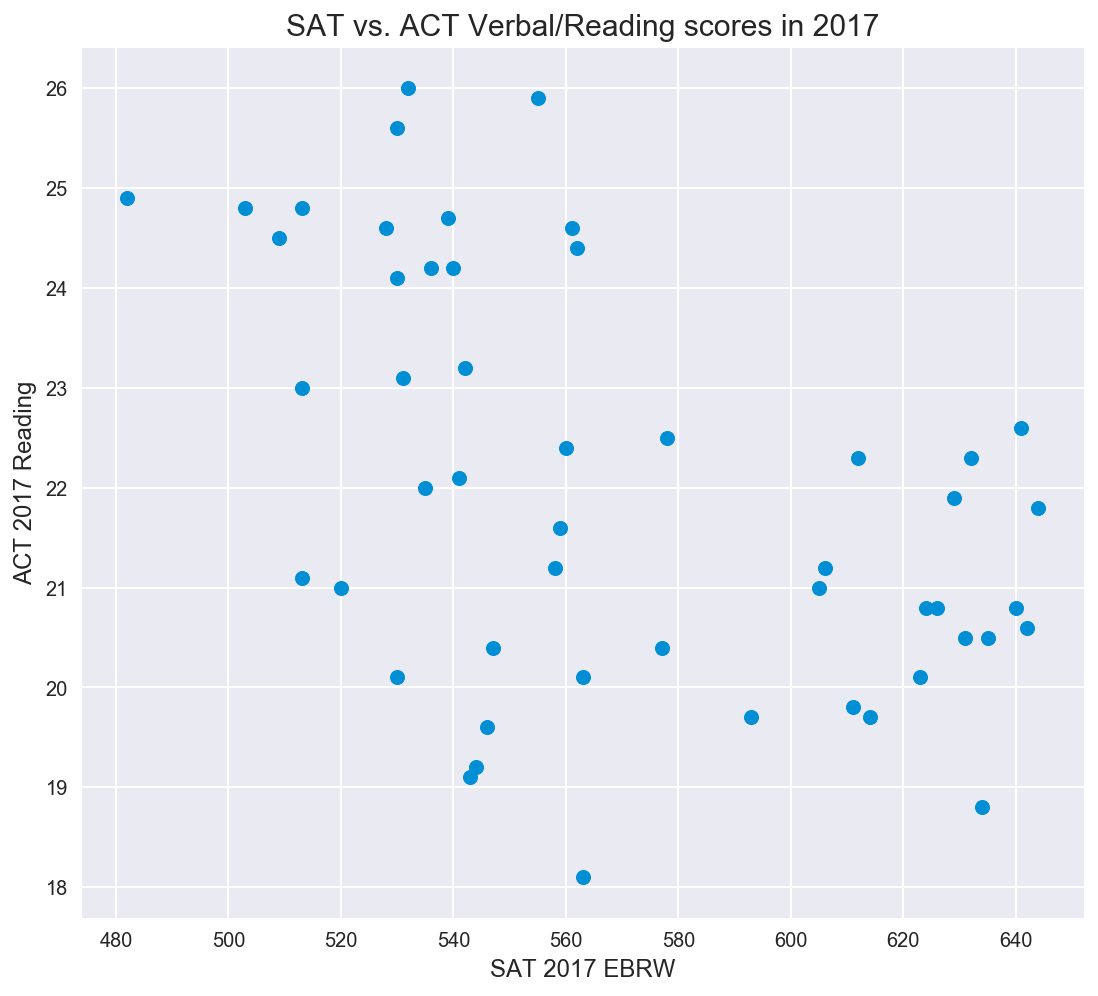

In [511]:
stat1 = 'sat_2017_ebrw'
stat2 = 'act_2017_reading'
custom_scatterplot(final, stat1, stat2, 
                   columns_dict[stat1], columns_dict[stat2],
                   'SAT vs. ACT Verbal/Reading scores in 2017')

**SAT vs. ACT total/composite scores for 2017**  


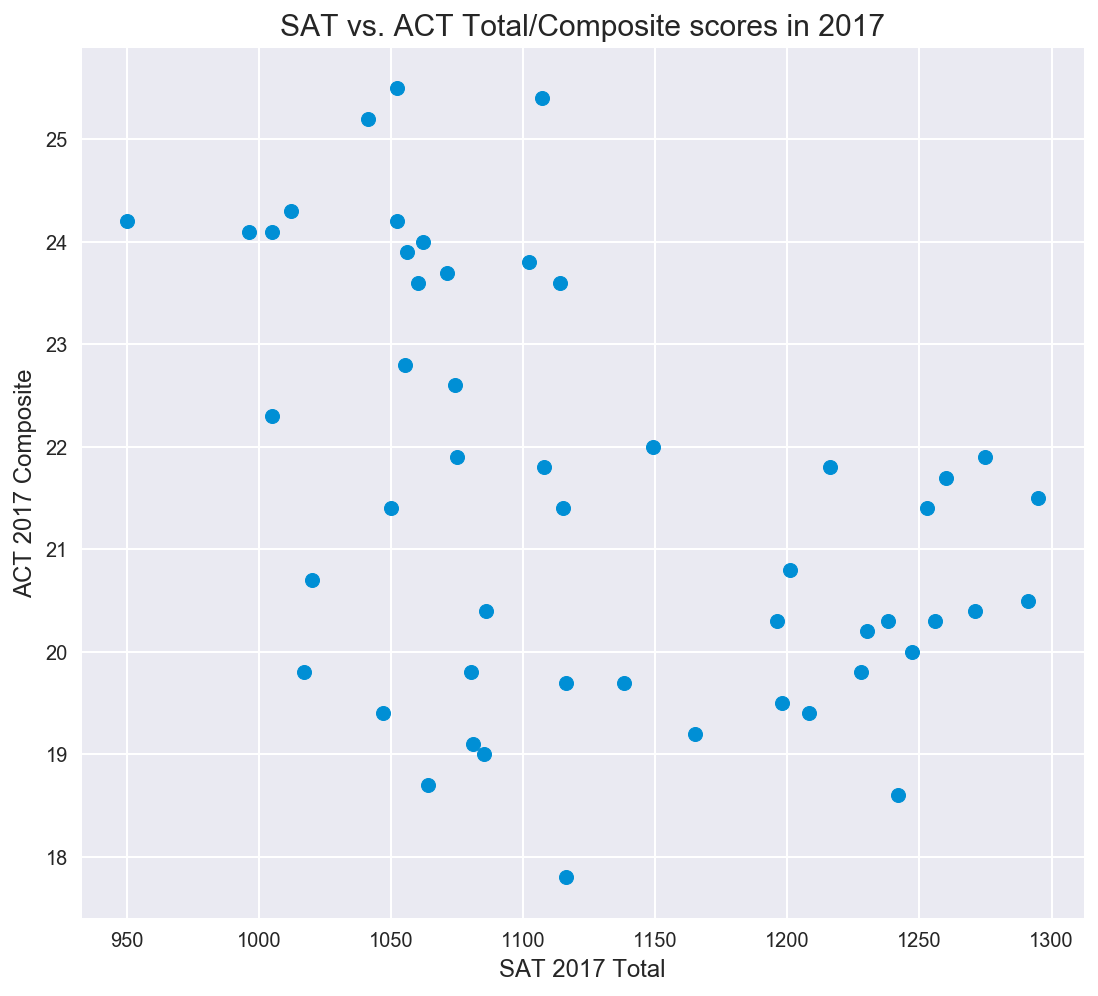

In [512]:
stat1 = 'sat_2017_total'
stat2 = 'act_2017_composite'
custom_scatterplot(final, stat1, stat2, 
                   columns_dict[stat1], columns_dict[stat2],
                   'SAT vs. ACT Total/Composite scores in 2017')

**SAT vs. ACT total/composite scores for 2017**  

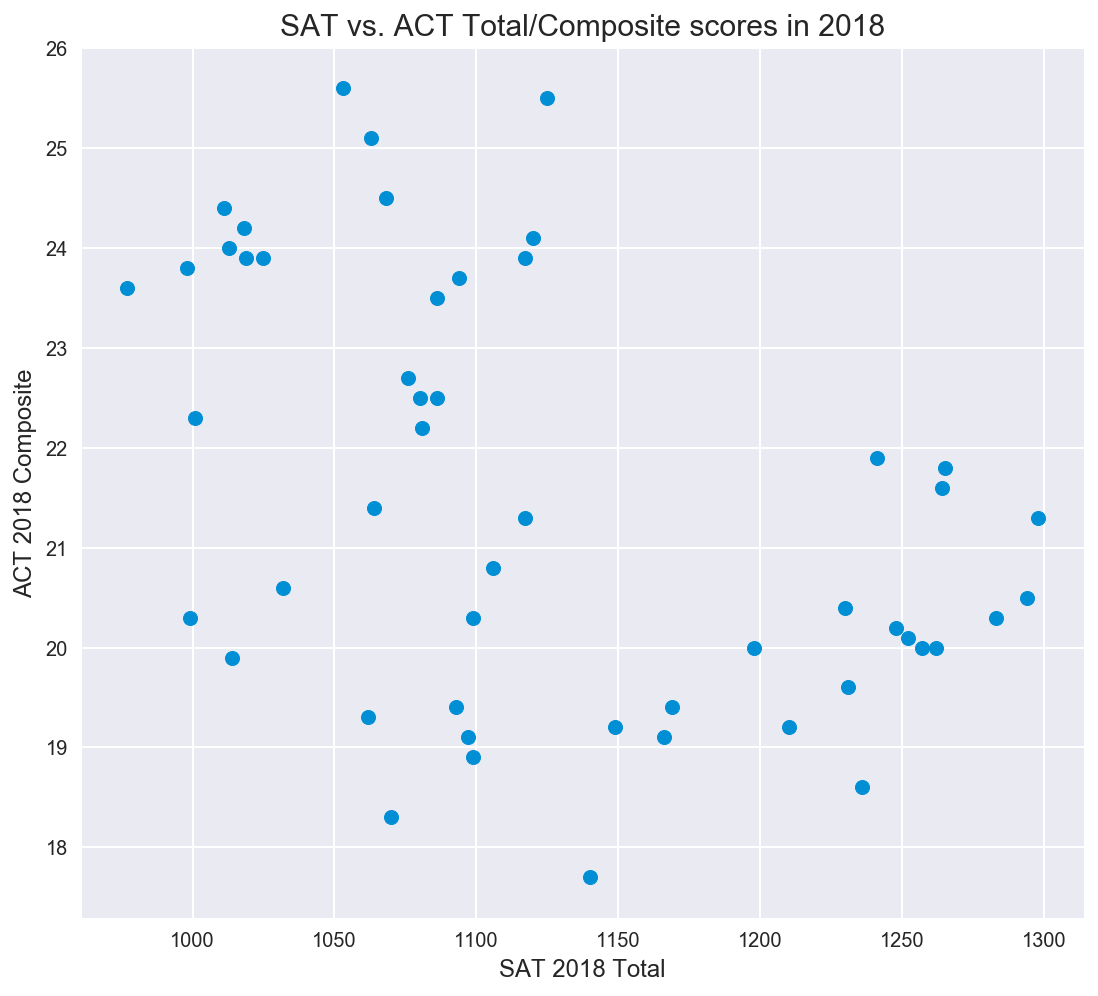

In [513]:
stat1 = 'sat_2018_total'
stat2 = 'act_2018_composite'
custom_scatterplot(final, stat1, stat2, 
                   columns_dict[stat1], columns_dict[stat2],
                   'SAT vs. ACT Total/Composite scores in 2018')

**Total scores for SAT 2017 vs. 2018**  


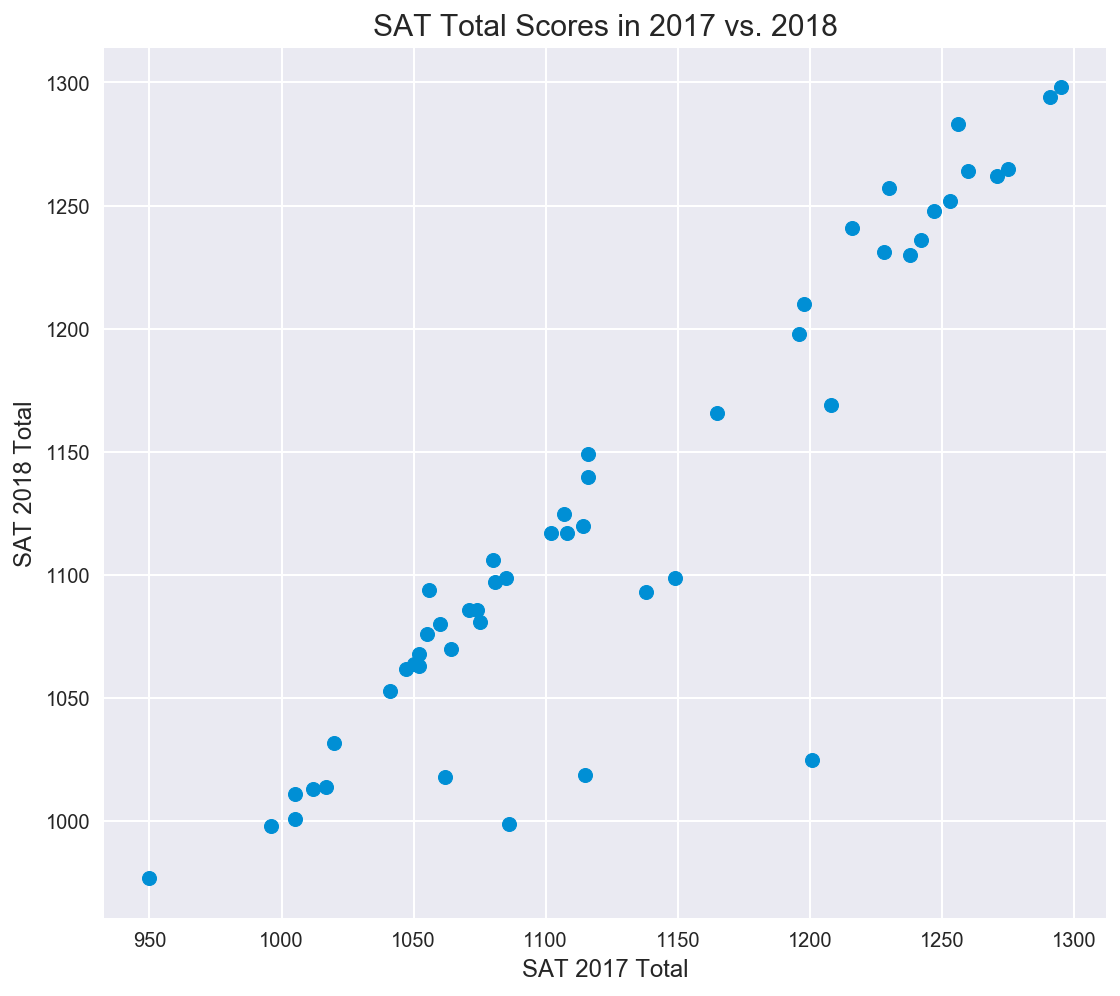

In [514]:
stat1 = 'sat_2017_total'
stat2 = 'sat_2018_total'
custom_scatterplot(final, stat1, stat2, 
                   columns_dict[stat1], columns_dict[stat2],
                   'SAT Total Scores in 2017 vs. 2018')

**Composite scores for ACT 2017 vs. 2018**  


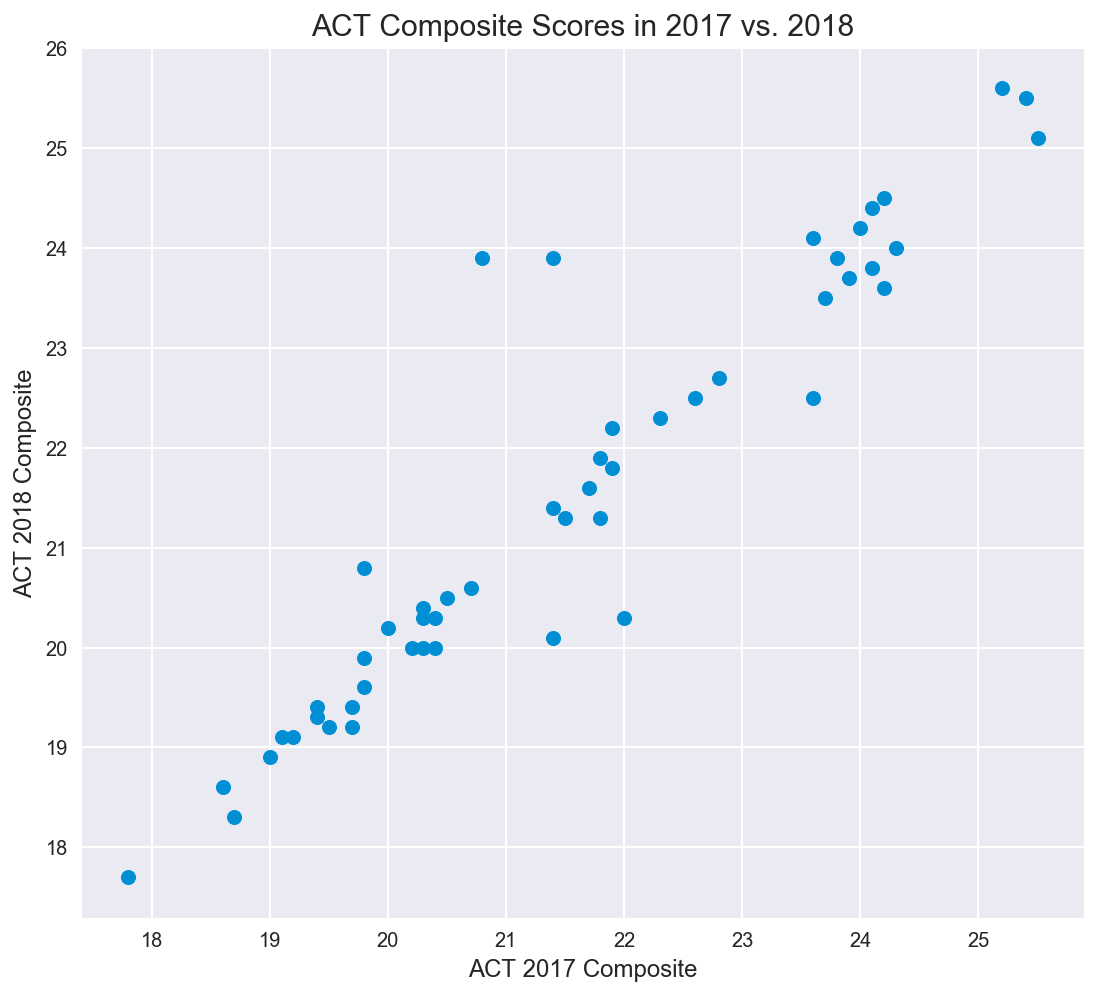

In [515]:
stat1 = 'act_2017_composite'
stat2 = 'act_2018_composite'
custom_scatterplot(final, stat1, stat2, 
                   columns_dict[stat1], columns_dict[stat2],
                   'ACT Composite Scores in 2017 vs. 2018')

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [516]:
def subplot_boxplots(df, list_of_columns, xlabels, title): 
    box = sns.boxplot(df[list_of_columns])
    box.set_title(title)
    box.set(xticklabels = xlabels)



**SAT Participation Rates**  


/anaconda3/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)
/anaconda3/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


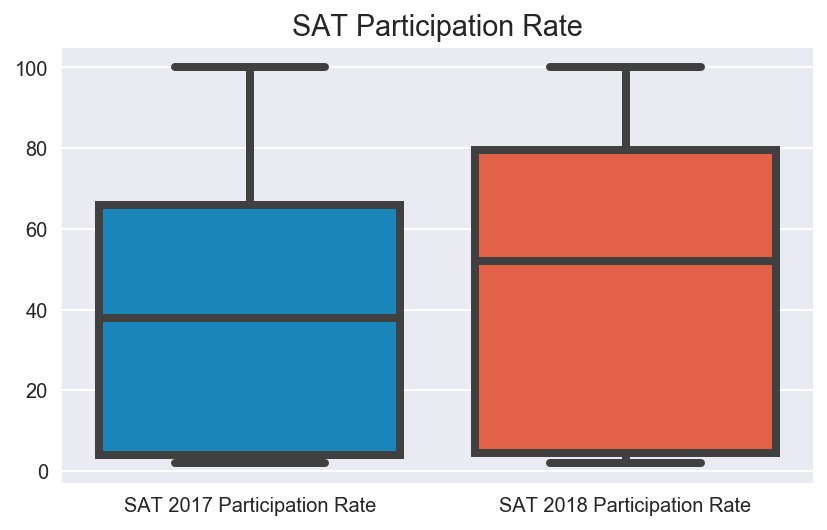

In [517]:
# column_names = [sat_participation, act_participation, sat_math, act_math, 
#                 sat_ebrw, act_ebrw, sat_total, act_composite]

columns = sat_participation
title = 'SAT Participation Rate'
subplot_boxplots(final, columns, [columns_dict[col] for col in columns], title)

**ACT Participation Rates**  


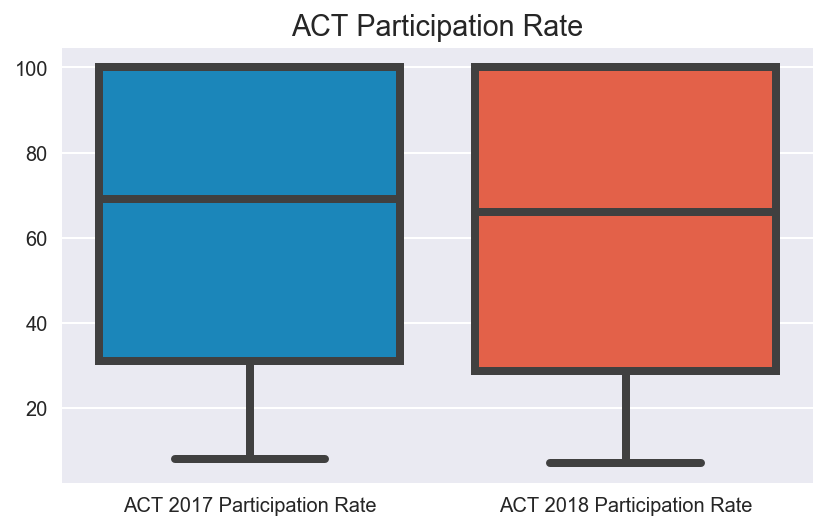

In [518]:
columns = act_participation
title = 'ACT Participation Rate'
subplot_boxplots(final, columns, [columns_dict[col] for col in columns], title)

**SAT Math Scores**  


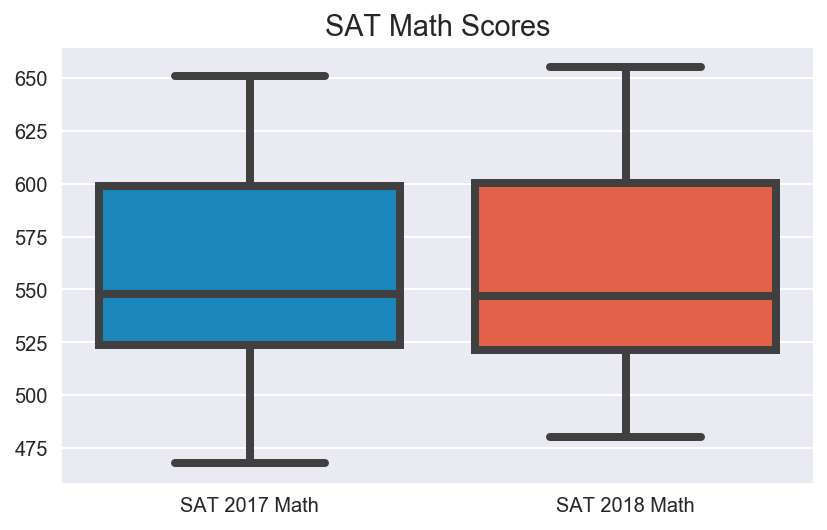

In [519]:
columns = sat_math
title = 'SAT Math Scores'
subplot_boxplots(final, columns, [columns_dict[col] for col in columns], title)

**ACT Math Scores**  


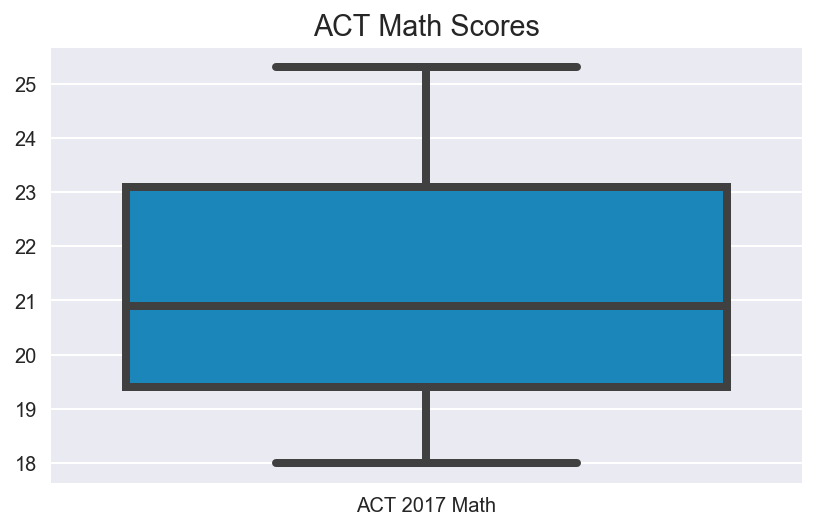

In [520]:
columns = act_math
title = 'ACT Math Scores'
subplot_boxplots(final, columns, [columns_dict[col] for col in columns], title)

**SAT EBRW Scores**  


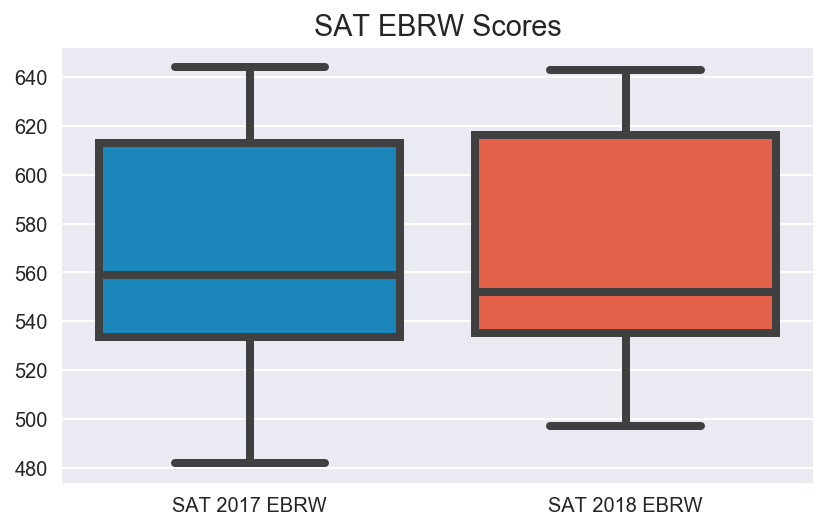

In [521]:
columns = sat_ebrw
title = 'SAT EBRW Scores'
subplot_boxplots(final, columns, [columns_dict[col] for col in columns], title)

**ACT English and Reading Scores**  


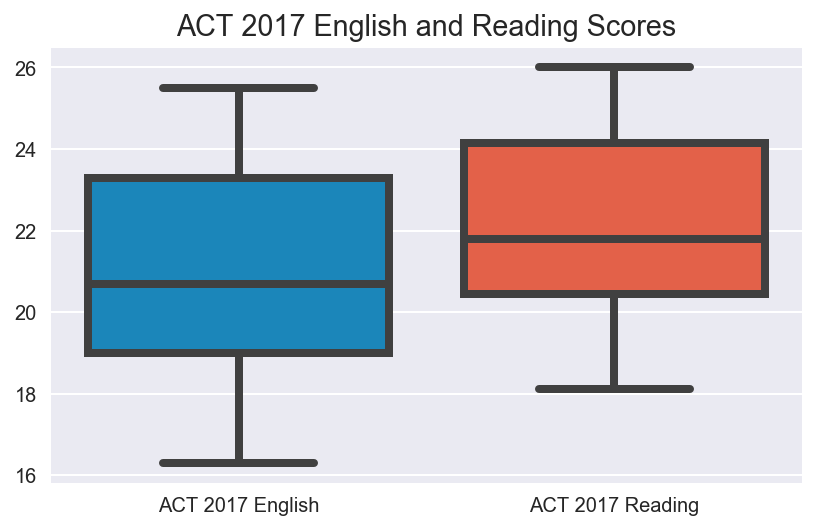

In [522]:
columns = act_ebrw
title = 'ACT 2017 English and Reading Scores'
subplot_boxplots(final, columns, [columns_dict[col] for col in columns], title)

**SAT Total Scores**  


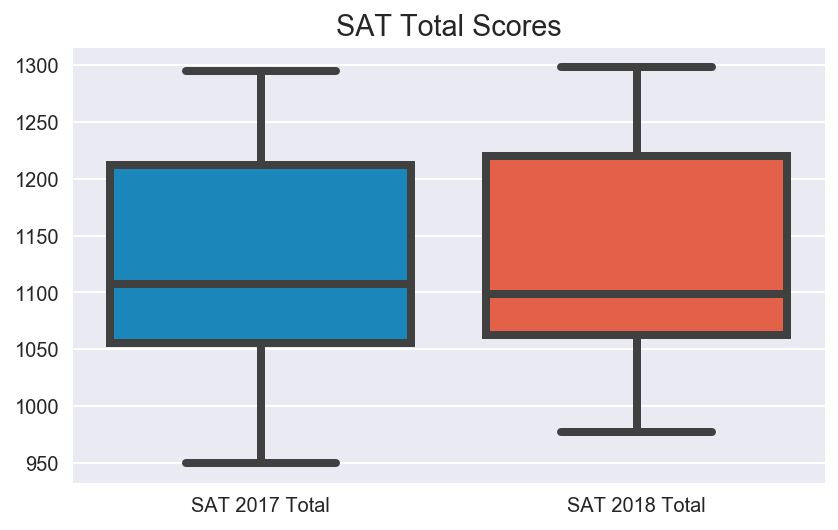

In [523]:
columns = sat_total
title = 'SAT Total Scores'
subplot_boxplots(final, columns, [columns_dict[col] for col in columns], title)

**ACT Composite Scores**  


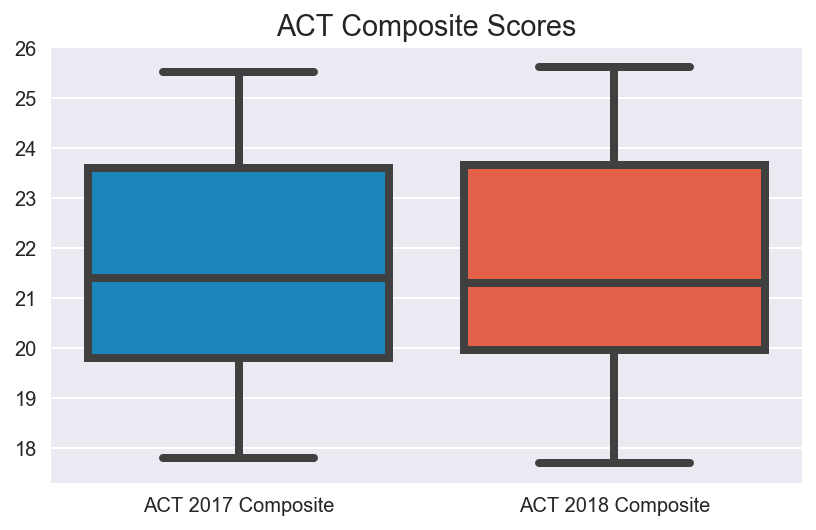

In [524]:
columns = act_composite
title = 'ACT Composite Scores'
subplot_boxplots(final, columns, [columns_dict[col] for col in columns], title)

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [525]:
def stacked_scatterplot(df, x1, y1, x2, y2, xlab, ylab, title, legend):
    # Set figure size and axes labels
    plt.figure(figsize = (8, 8))
    plt.title(title, fontsize = 15)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    
    # Plot the scatterplot
    plt.scatter(df[x1], df[y1], color = 'b')
    plt.scatter(df[x2], df[y2], color = 'orange')
    
    plt.legend(legend, loc = 'upper right', fontsize = 15)
        

**SAT Participation vs SAT Total Scores in 2017 and 2018** 

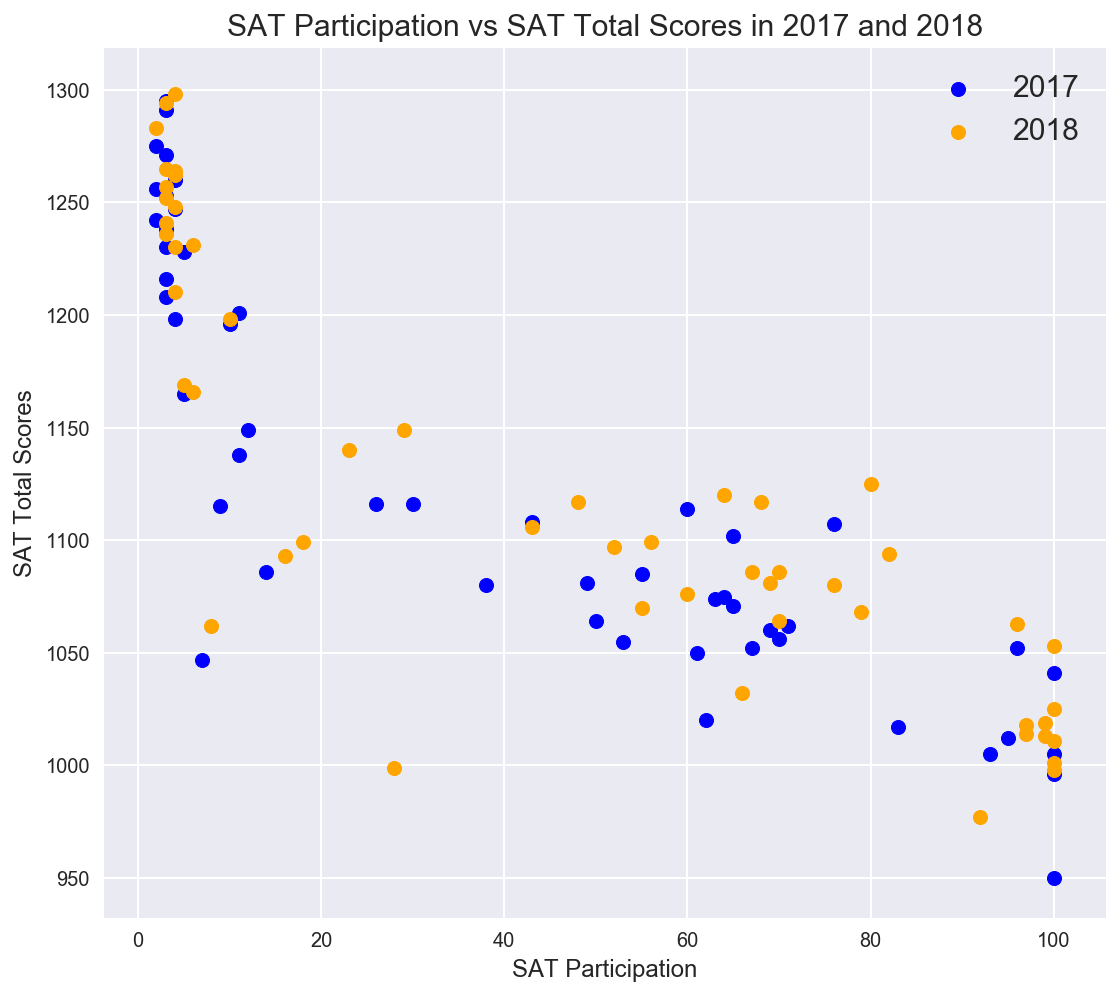

In [526]:
stat1 = 'sat_2017_participation'
stat2 = 'sat_2017_total'
stat3 = 'sat_2018_participation'
stat4 = 'sat_2018_total'
stacked_scatterplot(final, stat1, stat2, stat3, stat4,
                   'SAT Participation', 'SAT Total Scores',
                   'SAT Participation vs SAT Total Scores in 2017 and 2018',
                   ['2017', '2018'])

**ACT Participation vs ACT Composite Scores in 2017 and 2018** 

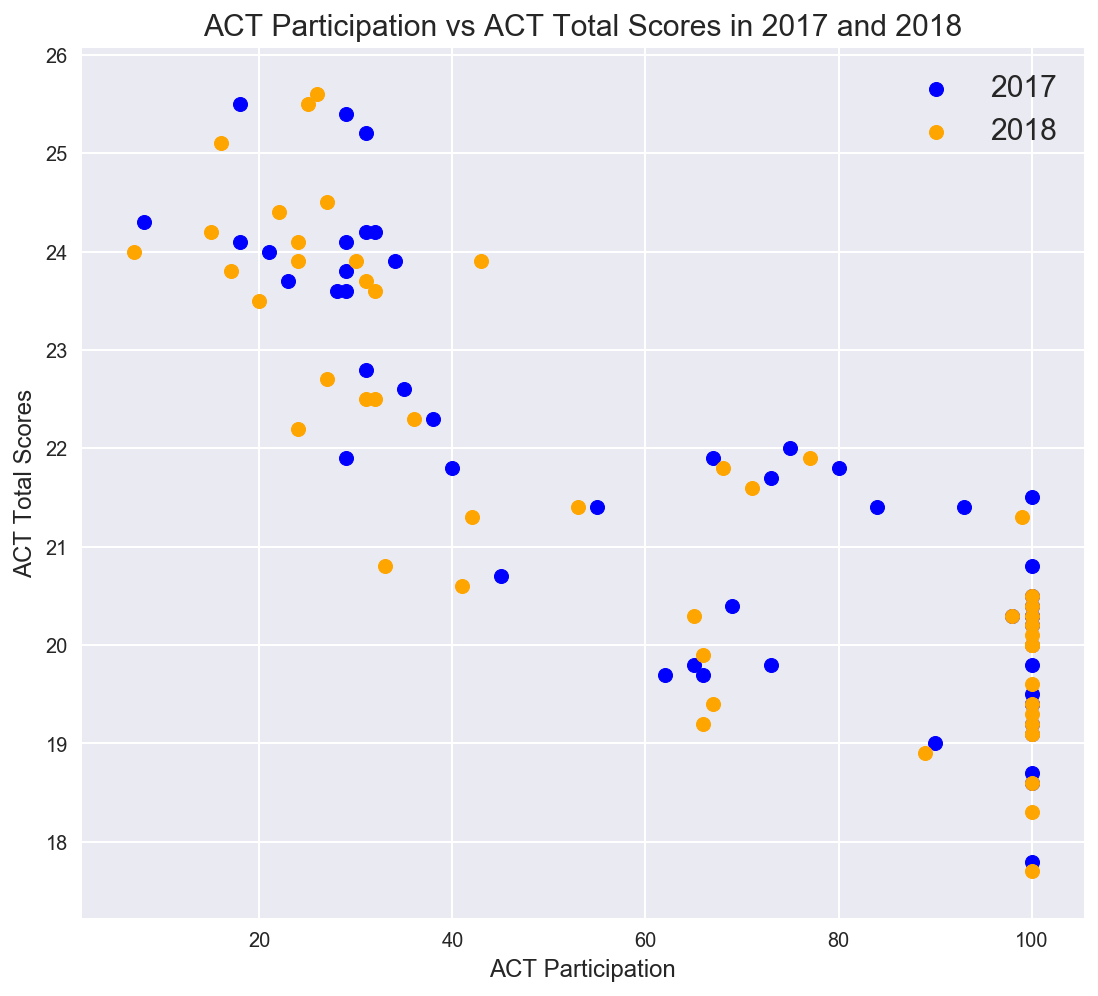

In [527]:
stat1 = 'act_2017_participation'
stat2 = 'act_2017_composite'
stat3 = 'act_2018_participation'
stat4 = 'act_2018_composite'
stacked_scatterplot(final, stat1, stat2, stat3, stat4,
                   'ACT Participation', 'ACT Total Scores',
                   'ACT Participation vs ACT Total Scores in 2017 and 2018',
                   ['2017', '2018'])

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:
The distributions tend to be bimodal. Participation rates are split between states that require either the SAT or ACT. Test scores are split between high achieving students and students who take the test out of requirement.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

The data for all columns appear to be bimodal, rather than normal. 

For participation rates, the two clusters may be identified as:
1. States that require the SAT
2. States that require the ACT

For test scores, the two clusters may be identified as:
1. Students intending to score high
2. Students who take the test out of requirement

This assumption holds true for math and reading.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

SAT and ACT participation tends to have an inverse relationship since most students are only required to take one of the tests for college admission.  The test they take tends to be influenced by individual state policies. Some states require the SAT, some require the ACT, some require neither. Students who take both tests are generally high achievers and intend to perform well in both.  There may not be sufficient data from one year to conduct meaningful statistical inference.


##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Since the SAT format was changed in 2016 to Math and EBRW only, the test scores of the graduating classes of 2017 and 2018 are comparable. The ACT math test was also made more difficult in 2016, so again these years are comparable. 

## Outside Research

The following three states had drastic changes in test participation rates from 2017 to 2018.

### [Illinois](https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html)
Illinois increased in SAT participation from 9% to 99%. Starting Fall 2016, Illinois high school juniors are required to take the SAT instead of the ACT. 

### [Colorado](https://www.chalkbeat.org/posts/co/2015/12/23/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers/)
Colorado increased in SAT participation from 11% to 100%. This is also caused by a statewide policy change in 2016 that requires all juniors to take the SAT.

### [Alaska](https://www.adn.com/alaska-news/education/2016/06/30/students-no-longer-need-national-tests-to-graduate/)
Alaska decreased ACT participation by 32% but only increased SAT participation by 5%. Starting Fall 2016, Alaska high school students no longer need national tests to graduate. 


In [528]:
change = pd.DataFrame()
change['state'] = final['state']
change['sat_participation_change'] = final['sat_2018_participation'] - final['sat_2017_participation']
change['act_participation_change'] = final['act_2018_participation'] - final['act_2017_participation']

# display most changes in SAT Participation
change = change.sort_values(by = 'sat_participation_change', ascending = False)
change.head().append(change.tail())

,state,sat_participation_change,act_participation_change
13,Illinois,90,-50
5,Colorado,89,-70
39,Rhode Island,26,-6
9,Florida,14,-7
48,West Virginia,14,-4
27,Nebraska,0,16
50,Wyoming,0,0
2,Arizona,-1,4
28,Nevada,-3,0
8,District of Columbia,-8,0


In [529]:
# display most changes in ACT Participation
change = change.sort_values(by = 'act_participation_change', ascending = True)
change.head().append(change.tail())

,state,sat_participation_change,act_participation_change
5,Colorado,89,-70
13,Illinois,90,-50
1,Alaska,5,-32
22,Michigan,0,-7
9,Florida,14,-7
37,Oregon,5,2
20,Maryland,7,3
2,Arizona,-1,4
27,Nebraska,0,16
35,Ohio,6,25


In [530]:
interesting_states = ['Illinois', 'Colorado', 'Ohio', 'District of Columbia', 'Alaska']
final.loc[final['state'].isin(interesting_states), ['state', 'sat_2017_participation', 'sat_2018_participation',
                                                    'act_2017_participation', 'act_2018_participation']] 

,state,sat_2017_participation,sat_2018_participation,act_2017_participation,act_2018_participation
1,Alaska,38,43,65,33
5,Colorado,11,100,100,30
8,District of Columbia,100,92,32,32
13,Illinois,9,99,93,43
35,Ohio,12,18,75,100


While SAT participation in Illinois and Colorado skyrocketed to 99-100%, average test scores dropped due to students unprepared to take the test.

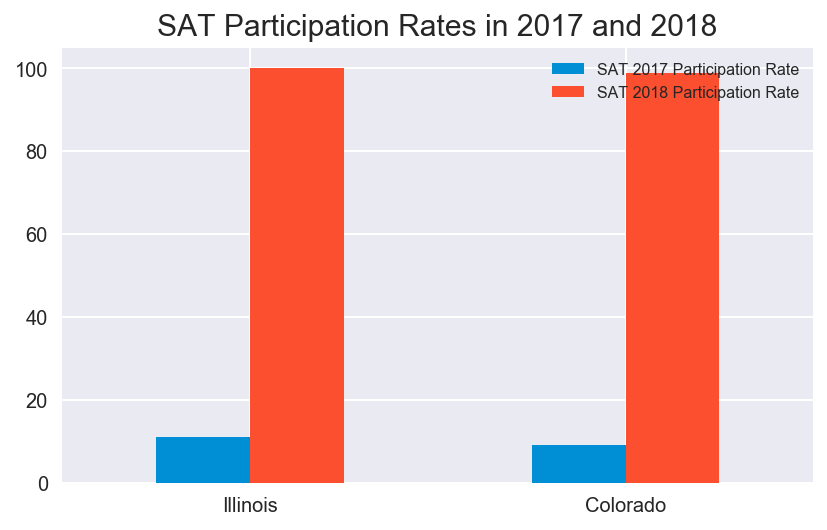

In [531]:
interesting_states = ['Illinois', 'Colorado']
mask = final['state'].isin(interesting_states)

final.loc[mask, sat_participation].plot(kind = 'bar')
plt.title('SAT Participation Rates in 2017 and 2018', fontsize = 15)
plt.xticks(np.arange(2), interesting_states, rotation = 'horizontal')
plt.legend([columns_dict[col] for col in sat_participation], loc = 'upper right', fontsize = 8)
# plt.xlabel('State')

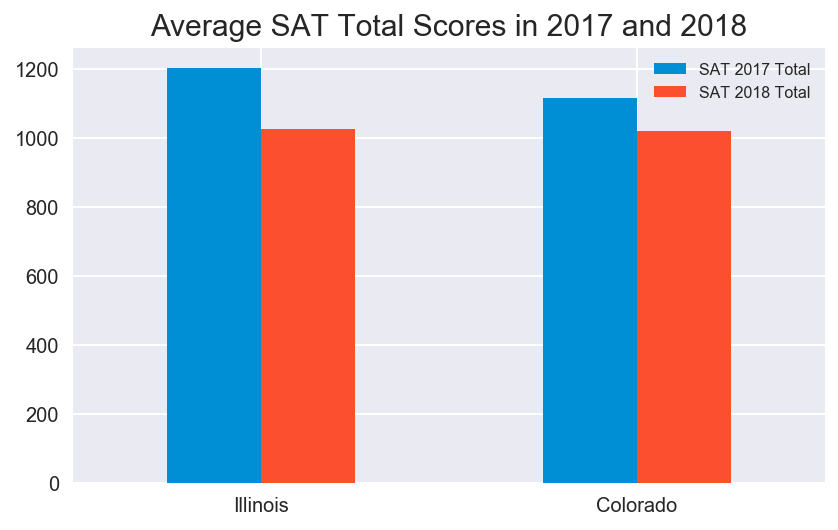

In [532]:
interesting_states = ['Illinois', 'Colorado']
mask = final['state'].isin(interesting_states)
interesting_columns = ['sat_2017_total', 'sat_2018_total']

final.loc[mask, interesting_columns].plot(kind = 'bar')
plt.title('Average SAT Total Scores in 2017 and 2018', fontsize = 15)
plt.xticks(np.arange(2), interesting_states, rotation = 'horizontal')
plt.legend([columns_dict[col] for col in interesting_columns], loc = 'upper right', fontsize = 8)
# plt.xlabel('State')

In [533]:
final.sort_values(by = 'sat_2018_participation')

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_ebrw,sat_2017_math,sat_2017_total,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_ebrw,sat_2018_math,sat_2018_total
34,North Dakota,98,19.0,20.4,20.5,20.6,20.3,2,635,621,1256,98,20.3,2,640,643,1283
50,Wyoming,100,19.4,19.8,20.8,20.6,20.2,3,626,604,1230,100,20.0,3,633,625,1257
41,South Dakota,80,20.7,21.5,22.3,22.0,21.8,3,612,603,1216,77,21.9,3,622,618,1241
27,Nebraska,84,20.9,20.9,21.9,21.5,21.4,3,629,625,1253,100,20.1,3,629,623,1252
49,Wisconsin,100,19.7,20.4,20.6,20.9,20.5,3,642,649,1291,100,20.5,3,641,653,1294
24,Mississippi,100,18.2,18.1,18.8,18.8,18.6,2,634,607,1242,100,18.6,3,630,606,1236
15,Iowa,67,21.2,21.3,22.6,22.1,21.9,2,641,635,1275,68,21.8,3,634,631,1265
44,Utah,100,19.5,19.9,20.8,20.6,20.3,3,624,614,1238,100,20.4,4,618,612,1230
23,Minnesota,100,20.4,21.5,21.8,21.6,21.5,3,644,651,1295,99,21.3,4,643,655,1298
18,Louisiana,100,19.4,18.8,19.8,19.6,19.5,4,611,586,1198,100,19.2,4,615,595,1210


## Conclusions and Recommendations

To simply increase SAT Participation rates, implement a statewide policy that requires the SAT to be taken by all high school juniors and waive the test fee.  However, only implementing this policy will cause a decrease in average test scores. Students must also be provided SAT prep throughout the school year prior to taking the test. This may be in the form of daily problem sets given to high school juniors in their Math and English class, regardless of their level.  States with low SAT partipication rates, such as **Wyoming**, may implement this policy.